# ÎåìÍ∏Ä ÏàòÏßëÍ≥º ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨(NLP) Î∞è Î∂ÑÏÑù

## Module Import

In [139]:
import pandas as pd
import numpy as np

# Î™ÖÏÇ¨Ï∂îÏ∂úÌõÑ, Ïπ¥Ïö¥ÌåÖ
from collections import Counter

# Mecab
from konlpy.tag import Mecab
# Mecab ÏÇ¨Ï†Ñ Ï∂îÍ∞ÄÌï† Îïå, Ï¢ÖÏÑ± Ïù∏ÏßÄÌïòÎäî Î™®Îìà
from jamo import h2j, j2hcj 

# ÌïúÍ∏Ä Ï∂îÏ∂ú
import re

# ÏãúÍ∞ÅÌôî
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plotÏóê ÌïúÍ∏Ä ÌëúÏãú
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

from wordcloud import WordCloud
from PIL import Image
import squarify
from IPython.display import Image

# Word2Vec
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE

# Íµ∞ÏßëÎ∂ÑÏÑù
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# Scipy
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## Îç∞Ïù¥ÌÑ∞(ÎåìÍ∏ÄÎç∞Ïù¥ÌÑ∞) Î∂àÎü¨Ïò§Í∏∞
- ÏΩîÎìú : `WIL` Repo > `1. Crawling` > `ÌÅ¨Î°§Îü¨_Ïú†ÌäúÎ∏åÎåìÍ∏ÄÏàòÏßëÏö©.ipynb` Ï∞∏Í≥†

In [140]:
df = pd.read_csv('C:/workspace/ÏºÄÏù∏ÎåìÍ∏ÄÏàòÏßë.csv', encoding = 'utf-8', index = None)
df

Unnamed: 0                                       ID  \
0              0                      ÏàòÎ¶¨ Suri               
1              1                         Ïù¥Î¶ÑÏóÜÏùå               
2              2                          _ÏãùÎπµ               
3              3                       BESKIA               
4              4                qualification               
...          ...                                      ...   
1205        1205                   Sam Smiith               
1206        1206                           ÏáºÏñ¥               
1207        1207                     tina Lon               
1208        1208                          ÏñëÎ™ÖÍ∑ú               
1209        1209                      Du Stok               

                                                Comment  
0            ÌôòÍ∞ëÏùÑ Î∞îÎùºÎ≥¥Îäî Ïó∞ÏÑ∏ÏóêÎèÑ ÎèÑÏ†ÑÌïòÏãúÎäî Î™®ÏäµÏù¥ ÏßÑÏßú Î≠âÌÅ¥ÌïòÎÑ§Ïöî... ÏùëÏõêÌï©ÎãàÎã§!  
1                           Ï†êÏ†ê Ïà´ÏûêÍ∞Ä ÌÑ∞Î¨¥Îãà ÏóÜÏñ¥ÏßÄÎäîÍ≤å ÌÇ¨Ìè¨ÏûÑ „Öã„Öã„Öã„Öã„Öã„Öã  
2         ÏºÄÏ°∞Ïî® Ï†ÄÎ†áÍ≤å ÎπµÌÑ∞ÏßÑÍ±∞ Ï≤òÏùåÎ¥§Îã§ Îß®Ïù¥ÏïºÏù¥Î†áÍ≤å ÏûòÏõÉÏúºÎ©¥ ÏñºÎßàÎÇòÏ¢ãÏïÑ ÏΩîÎèÑ Îçî Ïª§Î≥¥Ïù¥Í≥†  
3           ÏßÄÎßòÎåÄÎ°ú Ìï©ÏÑ±Ìï¥ÏÑú ÏßÄÏõêÏãúÏºúÎ≤ÑÎ¶¨ÎäîÍ±∞ Ï§´ÎÇòÏõÉÍ∏∞ÎÑ§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã  
4     01:37ÏõÖÏû•Ìïú Î∞∞Í≤ΩÍ≥º Î≤†Ïß±ÏûàÎäî ÏûêÏÑ∏, ÌôîÎ©¥ Îì±Ïû•ÍπåÏßÄ ÏôÑÎ≤ΩÌïòÎã§ „Öã„ÖãÏßÑÏßú ÏûòÎßåÎìúÏÖ®ÎÑ§ ...  
...                                                 ...  
1205                                                 Sz  
1206                            Ï†úÎ∞ú ÎÇ¥ Ïú†ÌäúÎ∏åÏóê Î≥¥Ïù¥ÏßÄÎßà Íº¥Î≥¥Í∏∞ Ïã´Ïñ¥ „Ö†  
1207                 Î≥∏Ïù∏Ïù¥ ÌïòÎ©¥ Ïû¨ÎØ∏ ÎÇ®Ïù¥ ÌïòÎ©¥ Í≥†ÏÜåÌïúÍµ≠ ÏÇ¨Ìöå Ï∞∏ Ï†ïÍ≤®ÏõåÏ°åÎÑ§ „Öã„Öã  
1208                                              Î™®ÏßÄÎ¶¨Í∞ôÎÉê  
1209                                               Fake  

[1210 rows x 3 columns]

## Preprocessing
- ÎåìÍ∏Ä(Comment)Îßå Ï∂îÏ∂ú
- `Array` > `list` ÌòïÌÉúÎ°ú Î≥ÄÌôò

In [148]:
raw = df['Comment'].values
raw = list(raw)
raw = re.compile('[^„Ñ±-„Öé„Öè-„Ö£]+').findall(str(raw))
## ÏûêÏùå ÎòêÎäî Î™®ÏùåÎßå Ïì∞Ïù∏ ÎåìÍ∏Ä Ï†úÍ±∞
#raw = re.sub('[„Ñ±-„Ö£]', '', str(raw))
## ÌäπÏàòÎ¨∏Ïûê Ïì∞Ïù∏ ÎåìÍ∏Ä Ï†úÍ±∞
#raw = re.sub('[-=.#/?:${}[]‚ñ°‚ñ†‚ô•\]', '', str(raw))
raw

["['ÌôòÍ∞ëÏùÑ Î∞îÎùºÎ≥¥Îäî Ïó∞ÏÑ∏ÏóêÎèÑ ÎèÑÏ†ÑÌïòÏãúÎäî Î™®ÏäµÏù¥ ÏßÑÏßú Î≠âÌÅ¥ÌïòÎÑ§Ïöî... ÏùëÏõêÌï©ÎãàÎã§!', 'Ï†êÏ†ê Ïà´ÏûêÍ∞Ä ÌÑ∞Î¨¥Îãà ÏóÜÏñ¥ÏßÄÎäîÍ≤å ÌÇ¨Ìè¨ÏûÑ ",
 "', 'ÏºÄÏ°∞Ïî® Ï†ÄÎ†áÍ≤å ÎπµÌÑ∞ÏßÑÍ±∞ Ï≤òÏùåÎ¥§Îã§ Îß®Ïù¥ÏïºÏù¥Î†áÍ≤å ÏûòÏõÉÏúºÎ©¥ ÏñºÎßàÎÇòÏ¢ãÏïÑ ÏΩîÎèÑ Îçî Ïª§Î≥¥Ïù¥Í≥†', 'ÏßÄÎßòÎåÄÎ°ú Ìï©ÏÑ±Ìï¥ÏÑú ÏßÄÏõêÏãúÏºúÎ≤ÑÎ¶¨ÎäîÍ±∞ Ï§´ÎÇòÏõÉÍ∏∞ÎÑ§ ",
 "', '01:37ÏõÖÏû•Ìïú Î∞∞Í≤ΩÍ≥º Î≤†Ïß±ÏûàÎäî ÏûêÏÑ∏, ÌôîÎ©¥ Îì±Ïû•ÍπåÏßÄ ÏôÑÎ≤ΩÌïòÎã§ ",
 'ÏßÑÏßú ÏûòÎßåÎìúÏÖ®ÎÑ§ ',
 "', 'Í∏∞Î°ù ÏàòÏπòÍ∞Ä Ï°¥ÎÇò Í∑ºÎ≥∏ÏóÜÎäîÍ≤å Í∞úÏõÉÍπÄ",
 "', 'Í∞ÄÏßú ÏÇ¨ÎÇòÏù¥ 2Í∏∞ 0ÌôîÎ≥¥Í≥† ÏôîÏäµÎãàÎã§.ÏºÄÏù∏ÎãòÏù¥ Ï∞∏Ïó¨ Î™ªÌïòÏã† Í≤ÉÏù¥ ÏïÑÏâΩÎã§Í≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§.ÌïòÍ∏¥ ÏÇ¨Ïù¥ÌÅ¥ 2Ïùº 3ÏãúÍ∞ÑÌïòÍ≥† Îã¨Î¶¨Í∏∞ ÎßàÌïò 9Î°ú Í∞ÄÏãúÎäî ÏºÄÏù∏ÎãòÏù¥ Ï∞∏Ïó¨ÌïòÏÖ®Îã§Î©¥Ï°∞ÍµêÎì§Ïù¥ Ïò§ÌûàÎ†§ Ï≤¥Î†•Ïù¥ Îî∏Î†§ ÏöïÎ®πÏùÑÍπåÎ¥ê ÏºÄÏù∏ÎãòÏù¥ Î∂àÏ∞∏ÌïòÏã†Í≤å ÏïÑÎãåÍ∞Ä Ïã∂Ïñ¥ Ïù¥Ìï¥ÌïòÍ≥† ÏûàÏäµÎãàÎã§.', 'Ïù¥Î†áÍ≤å ÏΩîÍ∞Ä ÌÑ∞ÏßÄÍ≤å ÏõÉÏúºÏãúÎäî Í±¥ Ï≤® Î¥êÏöîÏù¥Í±¥ Í∑ÄÌïòÎÑ§Ïöî...', 'ÏßÑÏßú ÏºÄÏù∏Îãò ÏõÉÏúºÏãúÎãàÍπå

### MecabÏùÑ ÏÇ¨Ïö©Ìï¥ Î™ÖÏÇ¨ Ï∂îÏ∂ú

In [150]:
tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")

In [154]:
nouns = []
for review in raw:
    for noun in tagger.nouns(review):
        nouns.append(noun)
        
nouns

['ÌôòÍ∞ë',
 'Ïó∞ÏÑ∏',
 'ÎèÑÏ†Ñ',
 'Î™®Ïäµ',
 'ÏùëÏõê',
 'Ïà´Ïûê',
 'ÌÑ∞Î¨¥Îãà',
 'Í≤å',
 'Ìè¨',
 'ÏºÄ',
 'Ï°∞',
 'Ïî®',
 'Îπµ',
 'Í±∞',
 'ÏΩî',
 'Ìï©ÏÑ±',
 'ÏßÄÏõê',
 'Í±∞',
 'ÏõÖÏû•',
 'Î∞∞Í≤Ω',
 'Î≤†',
 'Ïß±',
 'ÏûêÏÑ∏',
 'ÌôîÎ©¥',
 'Îì±Ïû•',
 'ÏôÑÎ≤Ω',
 'Í∏∞Î°ù',
 'ÏàòÏπò',
 'Í∑ºÎ≥∏',
 'Í≤å',
 'ÍπÄ',
 'Í∞ÄÏßú',
 'ÏÇ¨ÎÇòÏù¥',
 'Ìôî',
 'ÏºÄÏù∏',
 'Ï∞∏Ïó¨',
 'Í≤É',
 'ÏÉùÍ∞Å',
 'ÏÇ¨Ïù¥ÌÅ¥',
 'Ïùº',
 'ÏãúÍ∞Ñ',
 'ÎßàÌïò',
 'ÏºÄÏù∏',
 'Ï∞∏Ïó¨',
 'Ï°∞Íµê',
 'Ï≤¥Î†•',
 'ÏºÄÏù∏',
 'Î∂àÏ∞∏',
 'Í≤å',
 'Ïù¥Ìï¥',
 'ÏΩî',
 'Í±¥',
 'Ïù¥Í±¥',
 'ÏºÄÏù∏',
 'ÏòÅÏÉÅ',
 'Î∂Ñ',
 'ÌÉÄÏßÄÎ¶¨',
 'ÍπÄÏÑ±Í∑º',
 'ÏòÅÏÉÅ',
 'ÏúÑÏ£º',
 'Í≤å',
 'Í≤É',
 'Ïóø',
 'ÎÇ†',
 'Ìåπ',
 'ÏãúÎß®',
 'Ïù∏Ïù∏',
 'Îπµ',
 'Î™®Ïäµ',
 'Îß®',
 'ÎßàÏßÄÎßâ',
 'Í∑πÏ∞¨',
 'ÏôÑÎ≤Ω',
 'Î≤à',
 'Î≥¥Ïûê',
 'ÏÇ¨Îûå',
 'ÏòÅÏÉÅ',
 'Í≥ÑÍ∏∞',
 'Ïù∏Ïù∏',
 'Î™®Ïäµ',
 'Ïßë',
 'Ïã≠',
 'Í∏ÄÏî®',
 'ÎèÑÎÑ§',
 'Ìù°Ïàò',
 'ÏºÄÏù∏',
 'ÏºÄÏù∏',
 'ÏòÅ',
 'Í±∞',
 'Ïò§ÎûúÎßå',
 'Ìãà',
 'ÏÇ¨Ïù¥',
 'ÏΩî',
 'Ìé∏ÏßëÏûê',
 'ÏÑºÏä§',
 'Í≤ΩÏùò',
 'Ìëú',
 'Í∏∞Î∂Ñ',
 'Î

In [156]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'ÏΩî': 149,
 'Í±∞': 115,
 'Îß®': 109,
 'ÎÇò': 94,
 'ÏºÄÏù∏': 91,
 'ÏòÅÏÉÅ': 77,
 'Ï°∞': 66,
 'ÏÇ¨ÎÇòÏù¥': 65,
 'Ïßë': 60,
 'Ïî®': 54,
 'ÏßÄÏõê': 52,
 'Í∞ÄÏßú': 52,
 'Î≤à': 52,
 'Í∞ú': 49,
 'ÎßàÌïò': 42,
 'Îßå': 41,
 'Ïù∏Ïù∏': 39,
 'Ïù¥Í±∞': 39,
 'Í≤å': 32,
 'Îπµ': 32,
 'ÌöåÏàò': 31,
 'Îïå': 30,
 'Ïùº': 28,
 'ÏºÄ': 26,
 'ÏïÑÎ∞©': 26,
 'ÏÇ¨Îûå': 23,
 'ÍπÄ': 22,
 'ÌÉ±': 21,
 'Î∂Ñ': 20,
 'Ìé∏Ïßë': 19,
 'Î¨∏Ï†ú': 19,
 'Í∞úÏûÖ': 19,
 'ÎÖ∏Ïù∏': 18,
 'ÎÇú': 18,
 'Î™®Ïäµ': 17,
 'Î∞òÏùë': 17,
 'ÏΩîÏΩî': 17,
 'Ï§Ñ': 17,
 'Ïù¥Í≤å': 17,
 'Ï£ºÏùò': 17,
 'Í≤É': 16,
 'ÎìØ': 16,
 'Ïú†ÌäúÎ∏å': 16,
 'ÎÑà': 16,
 'ÏãúÍ∞Ñ': 15,
 'Î≠ê': 15,
 'Í∏∞Î°ù': 14,
 'Í∏â': 14,
 'ÏõÉÏùå': 14,
 'ÏïÑÏ°∞': 13}

### Stopwords(Î∂àÏö©Ïñ¥) Dictionary ÎßåÎì§Í∏∞
- Source : "https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a#file-stopwords-ko-txt"

In [157]:
st = pd.read_csv('stopword.txt')
st = st['Í∞Ä'].values
st = list(st)
st

['Í∞ÄÍπåÏä§Î°ú',
 'Í∞ÄÎ†π',
 'Í∞Å',
 'Í∞ÅÍ∞Å',
 'Í∞ÅÏûê',
 'Í∞ÅÏ¢Ö',
 'Í∞ñÍ≥†ÎßêÌïòÏûêÎ©¥',
 'Í∞ôÎã§',
 'Í∞ôÏù¥',
 'Í∞úÏùòÏπòÏïäÍ≥†',
 'Í±∞ÎãàÏôÄ',
 'Í±∞Î∞î',
 'Í±∞Ïùò',
 'Í≤É',
 'Í≤ÉÍ≥º Í∞ôÏù¥',
 'Í≤ÉÎì§',
 'Í≤åÎã§Í∞Ä',
 'Í≤åÏö∞Îã§',
 'Í≤®Ïö∞',
 'Í≤¨ÏßÄÏóêÏÑú',
 'Í≤∞Í≥ºÏóê Ïù¥Î•¥Îã§',
 'Í≤∞Íµ≠',
 'Í≤∞Î°†ÏùÑ ÎÇº Ïàò ÏûàÎã§',
 'Í≤∏ÏÇ¨Í≤∏ÏÇ¨',
 'Í≥†Î†§ÌïòÎ©¥',
 'Í≥†Î°ú',
 'Í≥ß',
 'Í≥µÎèôÏúºÎ°ú',
 'Í≥º',
 'Í≥ºÏó∞',
 'Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§',
 'Í¥ÄÍ≥ÑÏóÜÏù¥',
 'Í¥ÄÎ†®Ïù¥ ÏûàÎã§',
 'Í¥ÄÌïòÏó¨',
 'Í¥ÄÌïú',
 'Í¥ÄÌï¥ÏÑúÎäî',
 'Íµ¨',
 'Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú',
 'Íµ¨ÌÜ†ÌïòÎã§',
 'Í∑∏',
 'Í∑∏Îì§',
 'Í∑∏Îïå',
 'Í∑∏Îûò',
 'Í∑∏ÎûòÎèÑ',
 'Í∑∏ÎûòÏÑú',
 'Í∑∏Îü¨ÎÇò',
 'Í∑∏Îü¨Îãà',
 'Í∑∏Îü¨ÎãàÍπå',
 'Í∑∏Îü¨Î©¥',
 'Í∑∏Îü¨ÎØÄÎ°ú',
 'Í∑∏Îü¨ÌïúÏ¶â',
 'Í∑∏Îü∞ ÍπåÎã≠Ïóê',
 'Í∑∏Îü∞Îç∞',
 'Í∑∏Îü∞Ï¶â',
 'Í∑∏Îüº',
 'Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†',
 'Í∑∏Î†áÍ≤å Ìï®ÏúºÎ°úÏç®',
 'Í∑∏Î†áÏßÄ',
 'Í∑∏Î†áÏßÄ ÏïäÎã§Î©¥',
 'Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥',
 'Í∑∏Î†áÏßÄÎßå',
 'Í∑∏Î†áÏßÄÏïäÏúºÎ©¥',
 'Í∑∏Î¶¨Í≥†',
 'Í∑∏Î¶¨ÌïòÏó¨',
 'Í∑∏ÎßåÏù¥Îã§',
 'Í∑∏Ïóê 

- Î∂àÏö©Ïñ¥ Ï†úÏô∏ ÌõÑ, ÌòïÌÉúÏÜå Î∂ÑÏÑù ÏàòÌñâ

In [158]:
nouns = []

for review in raw:
    for noun in tagger.nouns(review):
        if noun not in st:
            nouns.append(noun)
            
nouns[20]

'Î≤†'

- Îã®Ïñ¥ ÎπàÎèÑÏàò Ï∏°Ï†ï

In [159]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'ÏΩî': 149,
 'Í±∞': 115,
 'Îß®': 109,
 'ÏºÄÏù∏': 91,
 'ÏòÅÏÉÅ': 77,
 'Ï°∞': 66,
 'ÏÇ¨ÎÇòÏù¥': 65,
 'Ïßë': 60,
 'Ïî®': 54,
 'ÏßÄÏõê': 52,
 'Í∞ÄÏßú': 52,
 'Î≤à': 52,
 'Í∞ú': 49,
 'ÎßàÌïò': 42,
 'Îßå': 41,
 'Ïù∏Ïù∏': 39,
 'Ïù¥Í±∞': 39,
 'Í≤å': 32,
 'Îπµ': 32,
 'ÌöåÏàò': 31,
 'ÏºÄ': 26,
 'ÏïÑÎ∞©': 26,
 'ÏÇ¨Îûå': 23,
 'ÍπÄ': 22,
 'ÌÉ±': 21,
 'Î∂Ñ': 20,
 'Ìé∏Ïßë': 19,
 'Î¨∏Ï†ú': 19,
 'Í∞úÏûÖ': 19,
 'ÎÖ∏Ïù∏': 18,
 'ÎÇú': 18,
 'Î™®Ïäµ': 17,
 'Î∞òÏùë': 17,
 'ÏΩîÏΩî': 17,
 'Ï§Ñ': 17,
 'Ïù¥Í≤å': 17,
 'Ï£ºÏùò': 17,
 'ÎìØ': 16,
 'Ïú†ÌäúÎ∏å': 16,
 'Î≠ê': 15,
 'Í∏∞Î°ù': 14,
 'Í∏â': 14,
 'ÏõÉÏùå': 14,
 'ÏïÑÏ°∞': 13,
 'Ï§ë': 13,
 'ÎÇ¥': 13,
 'ÌÖê': 13,
 'Î∞∞': 13,
 'Ïàò': 13,
 'Îßê': 13}

## ÏãúÍ∞ÅÌôî1

- Îã®Ïñ¥ ÎπàÎèÑ ÏãúÍ∞ÅÌôî

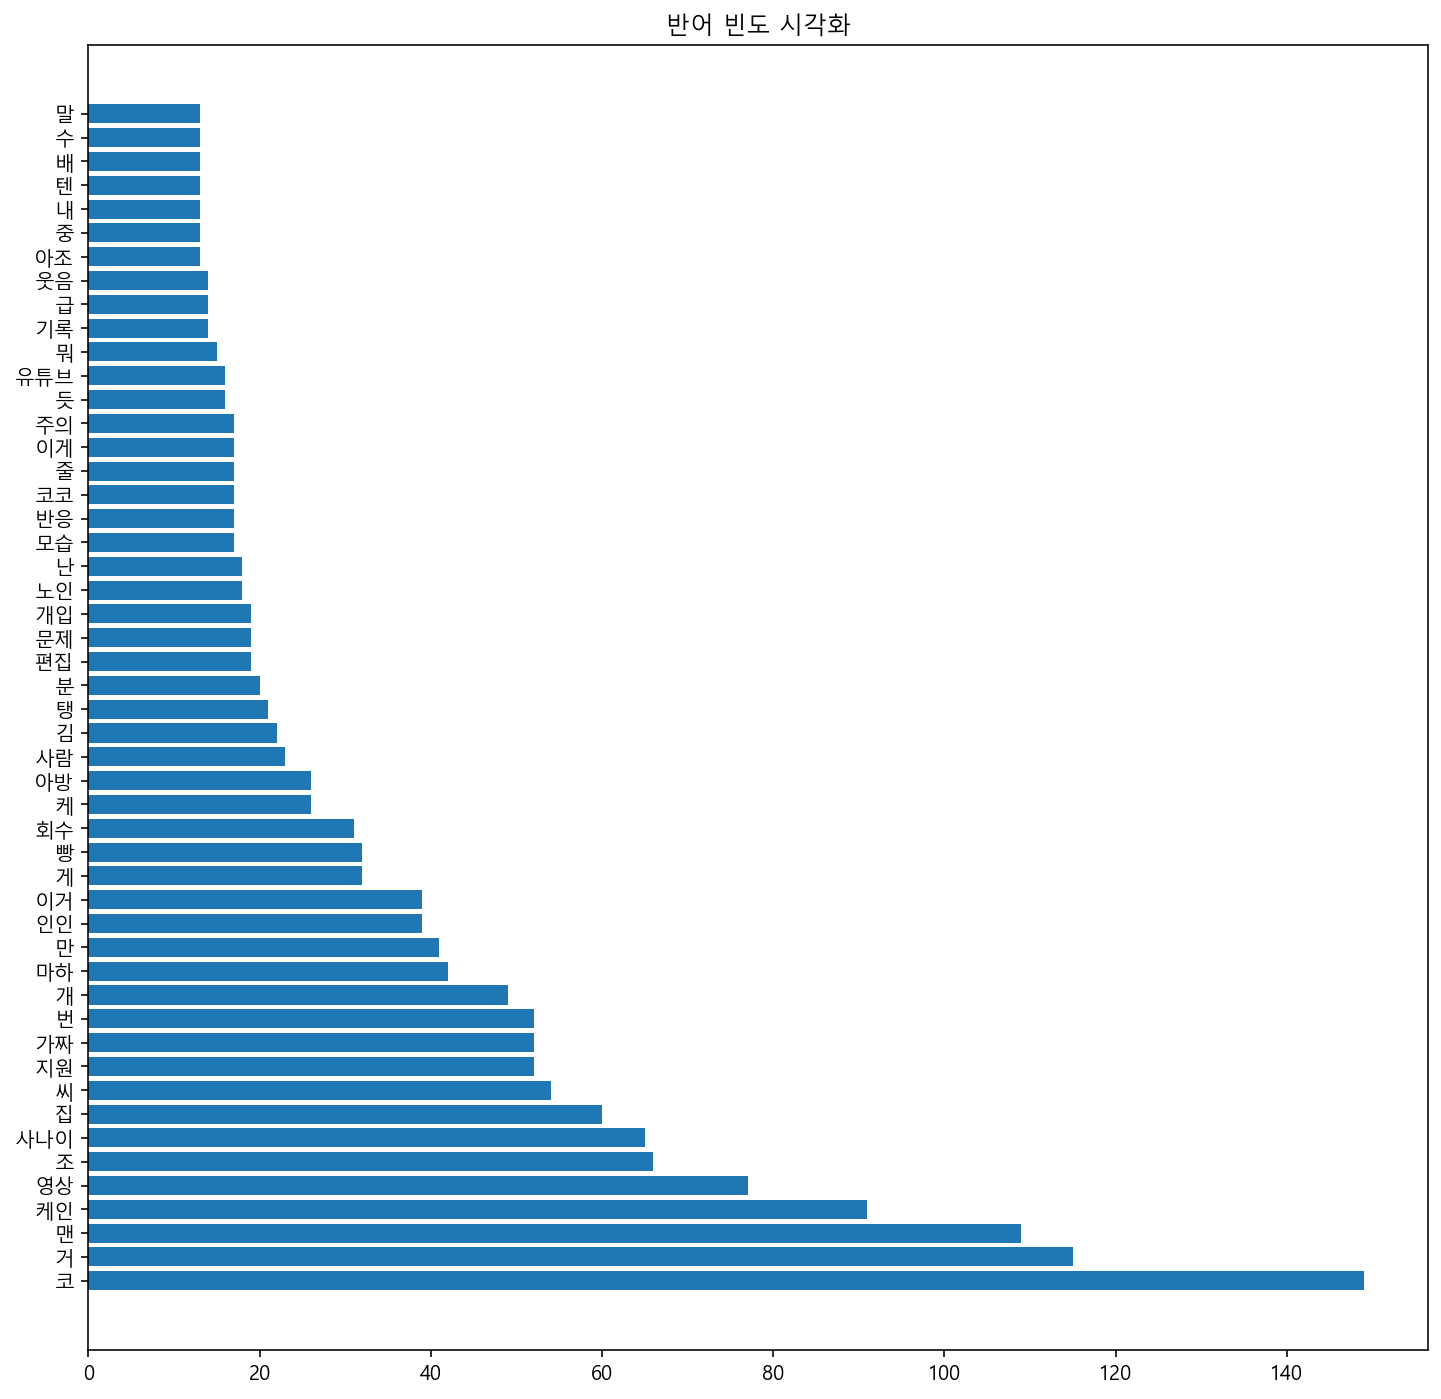

In [161]:
# Plot
y_pos = np.arange(len(top_nouns))

plt.figure(figsize = (12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Î∞òÏñ¥ ÎπàÎèÑ ÏãúÍ∞ÅÌôî')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

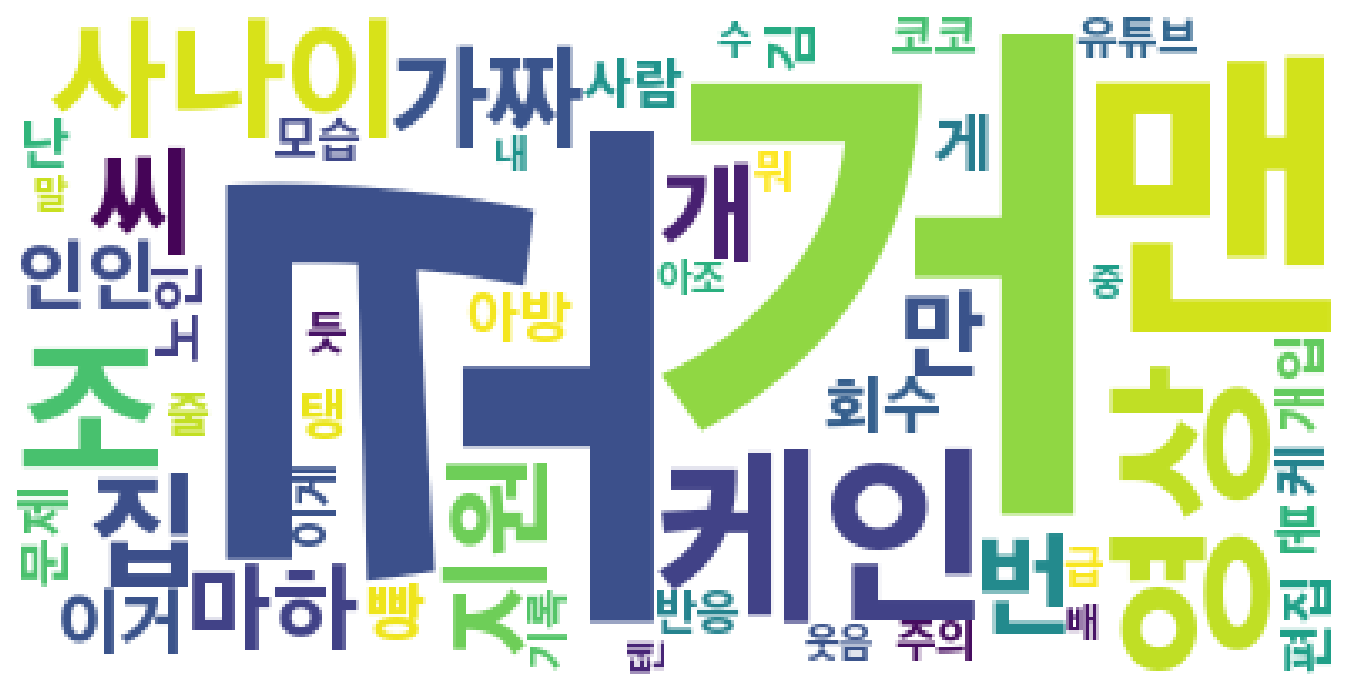

In [165]:
# Wordcloud
wc = WordCloud(background_color = 'white',
              font_path = 'C:/dd/AppleSDGothicNeoEB.ttf')
wc.generate_from_frequencies(top_nouns)

figure = plt.figure(figsize = (12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## ÌèâÍ∞Ä

- Mecab DictionaryÏóê Îã®Ïñ¥Î•º ÏùºÎ∂Ä Ï∂îÍ∞ÄÌï¥ÏïºÍ≤†Îã§. 
- Ïú†ÌäúÎ∏åÏóêÏÑú Ïì∞Ïù¥Îäî Ìï¥Îãπ Ïä§Ìä∏Î¶¨Î®∏ Î∞àÎì§Ïù¥ Î™®Îëê Î™ÖÏÇ¨Ï≤òÎ¶¨Í∞Ä ÏïàÎêòÏñ¥ Ï†úÎåÄÎ°úÎêú Î∂ÑÏÑùÏù¥ Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÍ≥† ÏûàÏùå.
    * Ï∂îÍ∞ÄÌï† Îã®Ïñ¥ : `ÏºÄÏ°∞Ïî®`,`ÏïÑÏ°∞Ïî®`, `ÏïÑÏ°∞Ïãú`, `ÏºÄÏ°∞Ïãú`, `Î≠âÌÉ±Ïù¥`, `ÌÉÄÏßÄÎ¶¨`, `Î∂àÏåçÎß®`, `Ïó≠Í∞ÄÎìú`, `ÌïòÎçîÎÜà`, `ÌïòÎçòÎÜà`, `Ìï†ÏïÑÎ∞©ÌÉ±`, `ÌñáÏΩîÏΩî`, `Î≠âÌÉ±` Îì±
- Ìï¥Îãπ Îã®Ïñ¥ Ï∂îÍ∞Ä ÌõÑ Í≤∞Í≥º Î≥¥Í≥† `stopword dictionary`ÎèÑ ÏàòÏ†ïÌï† ÏòàÏ†ï

## Î≥¥ÏôÑ

In [2]:
# dictÏ∂îÍ∞Ä Ï†Ñ Îã®Ïñ¥Î•º Ï†ÑÌòÄ Ïû°ÏïÑÎÇ¥ÏßÄÎ™ªÌï®
m = Mecab(r"C:/mecab/mecab-ko-dic")

m.pos('Ïù¥Í≤ÉÏùÄ ÌÖåÏä§Ìä∏ÏûÖÎãàÎã§. ÏºÄÏ°∞Ïî®Îäî ÏΩîÍ∞Ä Ï∞∏ ÌÅ∞ Î∂àÏåçÎß®Ïù¥Ïïº. Í∑ºÎç∞ ÏïÑÏ°∞Ïî®Í∞Ä Ïó≠Í∞ÄÎìú Ï∞ΩÏãúÏûêÎùºÎ©∞? ÌïúÎïå, ÌïòÎçîÎÜàÏù¥ÏòÄÍµ¨ÎÇò? Íµ¨Í∏ÄÏù¥ Î≠âÌÉ±Ïù¥Î°úÏûàÎÑ§')

[('Ïù¥Í≤É', 'NP'),
 ('ÏùÄ', 'JX'),
 ('ÌÖåÏä§Ìä∏', 'NNG'),
 ('ÏûÖÎãàÎã§', 'VCP+EF'),
 ('.', 'SF'),
 ('ÏºÄ', 'IC'),
 ('Ï°∞', 'NNP'),
 ('Ïî®', 'NNB'),
 ('Îäî', 'JX'),
 ('ÏΩî', 'NNG'),
 ('Í∞Ä', 'JKS'),
 ('Ï∞∏', 'MAG'),
 ('ÌÅ∞', 'VA+ETM'),
 ('Î∂àÏåçÎß®', 'NNP'),
 ('Ïù¥', 'VCP'),
 ('Ïïº', 'EF'),
 ('.', 'SF'),
 ('Í∑ºÎç∞', 'MAJ'),
 ('ÏïÑÏ°∞Ïî®', 'NNP'),
 ('Í∞Ä', 'JKS'),
 ('Ïó≠Í∞ÄÎìú', 'NNP'),
 ('Ï∞ΩÏãúÏûê', 'NNG'),
 ('ÎùºÎ©∞', 'VCP+EF'),
 ('?', 'SF'),
 ('ÌïúÎïå', 'NNG'),
 (',', 'SC'),
 ('ÌïòÎçîÎÜà', 'NNP'),
 ('Ïù¥', 'VCP'),
 ('ÏòÄ', 'EP'),
 ('Íµ¨ÎÇò', 'EF'),
 ('?', 'SF'),
 ('Íµ¨Í∏Ä', 'NNG'),
 ('Ïù¥', 'JKS'),
 ('Î≠âÌÉ±', 'NNP'),
 ('Ïù¥', 'XSN'),
 ('Î°ú', 'JKB'),
 ('Ïûà', 'VV'),
 ('ÎÑ§', 'EC')]

### ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌïòÎäî Îã®Ïñ¥ Ï∂îÍ∞Ä
- ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌïòÎäî Îã®Ïñ¥ Ï∂îÍ∞Ä
    - `nnp.csv` *Í≥†Ïú†Î™ÖÏÇ¨ ÌååÏùº*Ïóê Ï∂îÍ∞Ä

In [3]:
with open(r"C:/mecab/user-dic/nnp.csv", 'r', encoding = 'utf-8') as f:
    file_data = f.readlines()

In [4]:
file_data

['ÎåÄÏö∞,,,,NNP,*,F,ÎåÄÏö∞,*,*,*,*,*\n', 'Íµ¨Í∏Ä,,,,NNP,*,T,Íµ¨Í∏Ä,*,*,*,*,*\n']

In [8]:
# Ï¢ÖÏÑ± 'T', 'F' Ï∂îÍ∞Ä Ìï®Ïàò
def get_jongsung_TF(sample_text): 
    sample_text_list = list(sample_text) 
    last_word = sample_text_list[-1] 
    last_word_jamo_list = list(j2hcj(h2j(last_word))) 
    last_jamo = last_word_jamo_list[-1] 
    jongsung_TF = "T" 
    if last_jamo in ['„Öè', '„Öë', '„Öì', '„Öï', '„Öó', '„Öõ', '„Öú', '„Ö†', '„Ö°', '„Ö£', '„Öò', '„Öö', '„Öô', '„Öù', '„Öû', '„Ö¢', '„Öê,„Öî', '„Öü', '„Öñ', '„Öí']: 
        jongsung_TF = "F" 
        
    return jongsung_TF

In [9]:
# DictÏóê Ï∂îÍ∞ÄÌï† Îã®Ïñ¥
word_list = ['ÏºÄÏ°∞Ïî®', 'ÏºÄÏ°∞Ïãú', 'ÏïÑÏ°∞Ïî®', 'ÏïÑÏ°∞Ïãú', 'Î≠âÌÉ±Ïù¥', 'ÌÉÄÏßÄÎ¶¨', 'Î∂àÏåçÎß®', 'Ïó≠Í∞ÄÎìú', 'ÌïòÎçîÎÜà', 'ÌïòÎçòÎÜà', 'Ìï†ÏïÑÎ∞©ÌÉ±', 'ÌñáÏΩîÏΩî', 'Î≠âÌÉ±']

for word in word_list:
    jongsung_TF = get_jongsung_TF(word)
    
    # Dictionary Îã®Ïñ¥ ÌòïÏãù
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)
    
    file_data.append(line)

In [11]:
with open(r"C:/mecab/user-dic/nnp.csv", 'w', encoding = 'utf-8') as f:
    for line in file_data:
        f.write(str(line))  ## InputÌï†Îïå, str() Ìï®Ïàò Ïç®Ï§òÏïºÌï®

In [13]:
with open(r"C:/mecab/user-dic/nnp.csv", 'r', encoding = 'utf-8') as f:
    file_new = f.readlines()
    
file_new

['ÎåÄÏö∞,,,,NNP,*,F,ÎåÄÏö∞,*,*,*,*,*\n',
 'Íµ¨Í∏Ä,,,,NNP,*,T,Íµ¨Í∏Ä,*,*,*,*,*\n',
 'ÏºÄÏ°∞Ïãú,,,,NNP,*,F,ÏºÄÏ°∞Ïãú,*,*,*,*,*\n',
 'ÏïÑÏ°∞Ïî®,,,,NNP,*,F,ÏïÑÏ°∞Ïî®,*,*,*,*,*\n',
 'ÏïÑÏ°∞Ïãú,,,,NNP,*,F,ÏïÑÏ°∞Ïãú,*,*,*,*,*\n',
 'Î≠âÌÉ±Ïù¥,,,,NNP,*,F,Î≠âÌÉ±Ïù¥,*,*,*,*,*\n',
 'ÌÉÄÏßÄÎ¶¨,,,,NNP,*,F,ÌÉÄÏßÄÎ¶¨,*,*,*,*,*\n',
 'Î∂àÏåçÎß®,,,,NNP,*,T,Î∂àÏåçÎß®,*,*,*,*,*\n',
 'Ïó≠Í∞ÄÎìú,,,,NNP,*,F,Ïó≠Í∞ÄÎìú,*,*,*,*,*\n',
 'ÌïòÎçîÎÜà,,,,NNP,*,T,ÌïòÎçîÎÜà,*,*,*,*,*\n',
 'ÌïòÎçòÎÜà,,,,NNP,*,T,ÌïòÎçòÎÜà,*,*,*,*,*\n',
 'Ìï†ÏïÑÎ∞©ÌÉ±,,,,NNP,*,T,Ìï†ÏïÑÎ∞©ÌÉ±,*,*,*,*,*\n',
 'ÌñáÏΩîÏΩî,,,,NNP,*,F,ÌñáÏΩîÏΩî,*,*,*,*,*\n',
 'Î≠âÌÉ±,,,,NNP,*,T,Î≠âÌÉ±,*,*,*,*,*\n']

### Compile

- ÏÇ¨Ï†ÑÏ∂îÍ∞Ä ÌõÑ
> Window `powershell` Ïã§Ìñâ  > `cd /mecab` > `tools\add-userdic-win.ps1` > " done! " Îú®Î©¥ ÏôÑÎ£å
- ÌòπÏãúÎÇò, `Ïù¥ ÏãúÏä§ÌÖúÏóêÏÑú Ïä§ÌÅ¨Î¶ΩÌä∏Î•º Ïã§ÌñâÌï† Ïàò ÏóÜÏúºÎØÄÎ°ú ~~Ïóê ÌååÏùºÏùÑ Î°úÎìúÌï† Ïàò ÏóÜÎã§.`ÎùºÎäî Ïò§Î•òÍ∞Ä Îú∞ Í≤ΩÏö∞, `executionPolicy` ÏûÖÎ†• ÌõÑ, `Restricted`Î©îÏãúÏßÄ ÌôïÏù∏<br></br>
- `Set-ExecutionPolicy Unrestricted` ÏûÖÎ†• ÌõÑ, ÏúÑ Í≥ºÏ†ï Îã§Ïãú Î∞òÎ≥µ

- Dictionary Ï∂îÍ∞Ä Í≤∞Í≥º ÌôïÏù∏

In [3]:
m = Mecab(r"C:/mecab/mecab-ko-dic")

m.pos('Ïù¥Í≤ÉÏùÄ ÌÖåÏä§Ìä∏ÏûÖÎãàÎã§. ÏºÄÏ°∞ÏãúÎäî ÏΩîÍ∞Ä Ï∞∏ ÌÅ∞ Î∂àÏåçÎß®Ïù¥Ïïº. \
      Í∑ºÎç∞ ÏïÑÏ°∞Ïî®Í∞Ä Ïó≠Í∞ÄÎìú Ï∞ΩÏãúÏûêÎùºÎ©∞? ÌïúÎïå, ÌïòÎçîÎÜàÏù¥ÏòÄÍµ¨ÎÇò? Íµ¨Í∏ÄÏù¥ Î≠âÌÉ±Ïù¥Î°úÏûàÎÑ§, ÏïÑÏ°∞ÏãúÎäî ÏΩîÍ∞Ä Ï†ïÎßêÎ°ú ÌÅ¨ÏßÄ. ÎßàÏπò ÌÉÄÏßÄÎ¶¨Ï≤òÎüº ÎßêÏù¥Ïïº \
      Ìï†ÏïÑÎ∞©ÌÉ±Ïù¥Îäî ÏΩîÍ∞Ä Í∏∏Í∏∞ÎïåÎ¨∏Ïóê ÌïòÎçîÎÜàÌïúÌÖå ÎßûÏïòÏßÄ.')

[('Ïù¥Í≤É', 'NP'),
 ('ÏùÄ', 'JX'),
 ('ÌÖåÏä§Ìä∏', 'NNG'),
 ('ÏûÖÎãàÎã§', 'VCP+EF'),
 ('.', 'SF'),
 ('ÏºÄÏ°∞Ïãú', 'NNP'),
 ('Îäî', 'JX'),
 ('ÏΩî', 'NNG'),
 ('Í∞Ä', 'JKS'),
 ('Ï∞∏', 'MAG'),
 ('ÌÅ∞', 'VA+ETM'),
 ('Î∂àÏåçÎß®', 'NNP'),
 ('Ïù¥', 'VCP'),
 ('Ïïº', 'EF'),
 ('.', 'SF'),
 ('Í∑ºÎç∞', 'MAJ'),
 ('ÏïÑÏ°∞Ïî®', 'NNP'),
 ('Í∞Ä', 'JKS'),
 ('Ïó≠Í∞ÄÎìú', 'NNP'),
 ('Ï∞ΩÏãúÏûê', 'NNG'),
 ('ÎùºÎ©∞', 'VCP+EF'),
 ('?', 'SF'),
 ('ÌïúÎïå', 'NNG'),
 (',', 'SC'),
 ('ÌïòÎçîÎÜà', 'NNP'),
 ('Ïù¥', 'VCP'),
 ('ÏòÄ', 'EP'),
 ('Íµ¨ÎÇò', 'EF'),
 ('?', 'SF'),
 ('Íµ¨Í∏Ä', 'NNG'),
 ('Ïù¥', 'JKS'),
 ('Î≠âÌÉ±', 'NNP'),
 ('Ïù¥', 'XSN'),
 ('Î°ú', 'JKB'),
 ('Ïûà', 'VX'),
 ('ÎÑ§', 'EF'),
 (',', 'SC'),
 ('ÏïÑÏ°∞Ïãú', 'NNP'),
 ('Îäî', 'JX'),
 ('ÏΩî', 'NNG'),
 ('Í∞Ä', 'JKS'),
 ('Ï†ïÎßêÎ°ú', 'MAG'),
 ('ÌÅ¨', 'VA'),
 ('ÏßÄ', 'EF'),
 ('.', 'SF'),
 ('ÎßàÏπò', 'MAG'),
 ('ÌÉÄÏßÄÎ¶¨', 'NNP'),
 ('Ï≤òÎüº', 'JKB'),
 ('Îßê', 'NNG'),
 ('Ïù¥', 'VCP'),
 ('Ïïº', 'EC'),
 ('Ìï†ÏïÑÎ∞©ÌÉ±', 'NNP'),
 ('Ïù¥', 'XSN'),
 ('Îäî', 'JX'),
 ('ÏΩ

- `ÏºÄÏ°∞Ïî®`, `ÌïòÎçòÎÜà` Ïù∏ÏßÄ Î™ªÌï®
    - ÌôïÏù∏ Í≤∞Í≥º, `ÏºÄÏ°∞Ïî®`Îäî ÎàÑÎùΩÎêêÍ≥†, `ÌïòÎçòÎÜà`ÏùÄ Ïûò Ï†ÄÏû•ÎêòÏñ¥ÏûàÏúºÎÇò Îã®Ïñ¥Î°ú Ïù∏Ïãù ÏïàÎêúÎã§

- ÎçîÎ∂àÏñ¥ÏÑú, `Ï°∞Ïù¥Í≥†`, `Ìä∏Ïàò`, `Ïä§Ìä∏Î¶¨Î®∏`, `Ï∞êÌÖê`, `Ìä∏ÏúÑÏπò`, `ÏºÄÏù∏Ïù∏Îãò` Ï∂îÍ∞Ä ÌïÑÏöî

- ÏÇ¨Ï†Ñ Ï∂îÍ∞Ä ÌõÑ, Îã§Ïãú Ï†ÅÏö©

In [3]:
df = pd.read_csv('C:/workspace/ÏºÄÏù∏ÎåìÍ∏ÄÏàòÏßë.csv', encoding = 'utf-8')
df

Unnamed: 0                                       ID  \
0              0                      ÏàòÎ¶¨ Suri               
1              1                         Ïù¥Î¶ÑÏóÜÏùå               
2              2                          _ÏãùÎπµ               
3              3                       BESKIA               
4              4                qualification               
...          ...                                      ...   
1205        1205                   Sam Smiith               
1206        1206                           ÏáºÏñ¥               
1207        1207                     tina Lon               
1208        1208                          ÏñëÎ™ÖÍ∑ú               
1209        1209                      Du Stok               

                                                Comment  
0            ÌôòÍ∞ëÏùÑ Î∞îÎùºÎ≥¥Îäî Ïó∞ÏÑ∏ÏóêÎèÑ ÎèÑÏ†ÑÌïòÏãúÎäî Î™®ÏäµÏù¥ ÏßÑÏßú Î≠âÌÅ¥ÌïòÎÑ§Ïöî... ÏùëÏõêÌï©ÎãàÎã§!  
1                           Ï†êÏ†ê Ïà´ÏûêÍ∞Ä ÌÑ∞Î¨¥Îãà ÏóÜÏñ¥ÏßÄÎäîÍ≤å ÌÇ¨Ìè¨ÏûÑ „Öã„Öã„Öã„Öã„Öã„Öã  
2         ÏºÄÏ°∞Ïî® Ï†ÄÎ†áÍ≤å ÎπµÌÑ∞ÏßÑÍ±∞ Ï≤òÏùåÎ¥§Îã§ Îß®Ïù¥ÏïºÏù¥Î†áÍ≤å ÏûòÏõÉÏúºÎ©¥ ÏñºÎßàÎÇòÏ¢ãÏïÑ ÏΩîÎèÑ Îçî Ïª§Î≥¥Ïù¥Í≥†  
3           ÏßÄÎßòÎåÄÎ°ú Ìï©ÏÑ±Ìï¥ÏÑú ÏßÄÏõêÏãúÏºúÎ≤ÑÎ¶¨ÎäîÍ±∞ Ï§´ÎÇòÏõÉÍ∏∞ÎÑ§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã  
4     01:37ÏõÖÏû•Ìïú Î∞∞Í≤ΩÍ≥º Î≤†Ïß±ÏûàÎäî ÏûêÏÑ∏, ÌôîÎ©¥ Îì±Ïû•ÍπåÏßÄ ÏôÑÎ≤ΩÌïòÎã§ „Öã„ÖãÏßÑÏßú ÏûòÎßåÎìúÏÖ®ÎÑ§ ...  
...                                                 ...  
1205                                                 Sz  
1206                            Ï†úÎ∞ú ÎÇ¥ Ïú†ÌäúÎ∏åÏóê Î≥¥Ïù¥ÏßÄÎßà Íº¥Î≥¥Í∏∞ Ïã´Ïñ¥ „Ö†  
1207                 Î≥∏Ïù∏Ïù¥ ÌïòÎ©¥ Ïû¨ÎØ∏ ÎÇ®Ïù¥ ÌïòÎ©¥ Í≥†ÏÜåÌïúÍµ≠ ÏÇ¨Ìöå Ï∞∏ Ï†ïÍ≤®ÏõåÏ°åÎÑ§ „Öã„Öã  
1208                                              Î™®ÏßÄÎ¶¨Í∞ôÎÉê  
1209                                               Fake  

[1210 rows x 3 columns]

In [4]:
raw = df['Comment'].values
raw = list(raw)
raw = re.compile('[^„Ñ±-„Öé„Öè-„Ö£]+').findall(str(raw))
raw

["['ÌôòÍ∞ëÏùÑ Î∞îÎùºÎ≥¥Îäî Ïó∞ÏÑ∏ÏóêÎèÑ ÎèÑÏ†ÑÌïòÏãúÎäî Î™®ÏäµÏù¥ ÏßÑÏßú Î≠âÌÅ¥ÌïòÎÑ§Ïöî... ÏùëÏõêÌï©ÎãàÎã§!', 'Ï†êÏ†ê Ïà´ÏûêÍ∞Ä ÌÑ∞Î¨¥Îãà ÏóÜÏñ¥ÏßÄÎäîÍ≤å ÌÇ¨Ìè¨ÏûÑ ",
 "', 'ÏºÄÏ°∞Ïî® Ï†ÄÎ†áÍ≤å ÎπµÌÑ∞ÏßÑÍ±∞ Ï≤òÏùåÎ¥§Îã§ Îß®Ïù¥ÏïºÏù¥Î†áÍ≤å ÏûòÏõÉÏúºÎ©¥ ÏñºÎßàÎÇòÏ¢ãÏïÑ ÏΩîÎèÑ Îçî Ïª§Î≥¥Ïù¥Í≥†', 'ÏßÄÎßòÎåÄÎ°ú Ìï©ÏÑ±Ìï¥ÏÑú ÏßÄÏõêÏãúÏºúÎ≤ÑÎ¶¨ÎäîÍ±∞ Ï§´ÎÇòÏõÉÍ∏∞ÎÑ§ ",
 "', '01:37ÏõÖÏû•Ìïú Î∞∞Í≤ΩÍ≥º Î≤†Ïß±ÏûàÎäî ÏûêÏÑ∏, ÌôîÎ©¥ Îì±Ïû•ÍπåÏßÄ ÏôÑÎ≤ΩÌïòÎã§ ",
 'ÏßÑÏßú ÏûòÎßåÎìúÏÖ®ÎÑ§ ',
 "', 'Í∏∞Î°ù ÏàòÏπòÍ∞Ä Ï°¥ÎÇò Í∑ºÎ≥∏ÏóÜÎäîÍ≤å Í∞úÏõÉÍπÄ",
 "', 'Í∞ÄÏßú ÏÇ¨ÎÇòÏù¥ 2Í∏∞ 0ÌôîÎ≥¥Í≥† ÏôîÏäµÎãàÎã§.ÏºÄÏù∏ÎãòÏù¥ Ï∞∏Ïó¨ Î™ªÌïòÏã† Í≤ÉÏù¥ ÏïÑÏâΩÎã§Í≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§.ÌïòÍ∏¥ ÏÇ¨Ïù¥ÌÅ¥ 2Ïùº 3ÏãúÍ∞ÑÌïòÍ≥† Îã¨Î¶¨Í∏∞ ÎßàÌïò 9Î°ú Í∞ÄÏãúÎäî ÏºÄÏù∏ÎãòÏù¥ Ï∞∏Ïó¨ÌïòÏÖ®Îã§Î©¥Ï°∞ÍµêÎì§Ïù¥ Ïò§ÌûàÎ†§ Ï≤¥Î†•Ïù¥ Îî∏Î†§ ÏöïÎ®πÏùÑÍπåÎ¥ê ÏºÄÏù∏ÎãòÏù¥ Î∂àÏ∞∏ÌïòÏã†Í≤å ÏïÑÎãåÍ∞Ä Ïã∂Ïñ¥ Ïù¥Ìï¥ÌïòÍ≥† ÏûàÏäµÎãàÎã§.', 'Ïù¥Î†áÍ≤å ÏΩîÍ∞Ä ÌÑ∞ÏßÄÍ≤å ÏõÉÏúºÏãúÎäî Í±¥ Ï≤® Î¥êÏöîÏù¥Í±¥ Í∑ÄÌïòÎÑ§Ïöî...', 'ÏßÑÏßú ÏºÄÏù∏Îãò ÏõÉÏúºÏãúÎãàÍπå

In [5]:
tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")

In [6]:
nouns = []
for review in raw:
    for noun in tagger.nouns(review):
        nouns.append(noun)
        
nouns

['ÌôòÍ∞ë',
 'Ïó∞ÏÑ∏',
 'ÎèÑÏ†Ñ',
 'Î™®Ïäµ',
 'ÏùëÏõê',
 'Ïà´Ïûê',
 'ÌÑ∞Î¨¥Îãà',
 'Í≤å',
 'Ìè¨',
 'ÏºÄÏ°∞Ïî®',
 'Îπµ',
 'Í±∞',
 'ÏΩî',
 'Ìï©ÏÑ±',
 'ÏßÄÏõê',
 'Í±∞',
 'ÏõÖÏû•',
 'Î∞∞Í≤Ω',
 'Î≤†',
 'Ïß±',
 'ÏûêÏÑ∏',
 'ÌôîÎ©¥',
 'Îì±Ïû•',
 'ÏôÑÎ≤Ω',
 'Í∏∞Î°ù',
 'ÏàòÏπò',
 'Í∑ºÎ≥∏',
 'Í≤å',
 'ÍπÄ',
 'Í∞ÄÏßú',
 'ÏÇ¨ÎÇòÏù¥',
 'Ìôî',
 'ÏºÄÏù∏',
 'Ï∞∏Ïó¨',
 'Í≤É',
 'ÏÉùÍ∞Å',
 'ÏÇ¨Ïù¥ÌÅ¥',
 'Ïùº',
 'ÏãúÍ∞Ñ',
 'ÎßàÌïò',
 'ÏºÄÏù∏',
 'Ï∞∏Ïó¨',
 'Ï°∞Íµê',
 'Ï≤¥Î†•',
 'ÏºÄÏù∏',
 'Î∂àÏ∞∏',
 'Í≤å',
 'Ïù¥Ìï¥',
 'ÏΩî',
 'Í±¥',
 'Ïù¥Í±¥',
 'ÏºÄÏù∏',
 'ÏòÅÏÉÅ',
 'Î∂Ñ',
 'ÌÉÄÏßÄÎ¶¨',
 'ÍπÄÏÑ±Í∑º',
 'ÏòÅÏÉÅ',
 'ÏúÑÏ£º',
 'Í≤å',
 'Í≤É',
 'Ïóø',
 'ÎÇ†',
 'Ìåπ',
 'ÏãúÎß®',
 'ÏºÄÏù∏Ïù∏Îãò',
 'Îπµ',
 'Î™®Ïäµ',
 'Îß®',
 'ÎßàÏßÄÎßâ',
 'Í∑πÏ∞¨',
 'ÏôÑÎ≤Ω',
 'Î≤à',
 'Î≥¥Ïûê',
 'ÏÇ¨Îûå',
 'ÏòÅÏÉÅ',
 'Í≥ÑÍ∏∞',
 'ÏºÄÏù∏Ïù∏Îãò',
 'Î™®Ïäµ',
 'Ïßë',
 'Ïã≠',
 'Í∏ÄÏî®',
 'ÎèÑÎÑ§',
 'Ìù°Ïàò',
 'ÏºÄÏù∏',
 'ÏºÄÏù∏',
 'ÏòÅ',
 'Í±∞',
 'Ïò§ÎûúÎßå',
 'Ìãà',
 'ÏÇ¨Ïù¥',
 'ÏΩî',
 'Ìé∏ÏßëÏûê',
 'ÏÑºÏä§',
 'Í≤ΩÏùò',
 'Ìëú',
 'Í∏∞Î∂Ñ',
 

In [7]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'ÏΩî': 148,
 'Í±∞': 115,
 'Îß®': 108,
 'ÎÇò': 94,
 'ÏºÄÏù∏': 88,
 'ÏòÅÏÉÅ': 77,
 'ÏÇ¨ÎÇòÏù¥': 65,
 'Ïßë': 60,
 'ÏßÄÏõê': 52,
 'Í∞ÄÏßú': 52,
 'Î≤à': 52,
 'Í∞ú': 49,
 'ÎßàÌïò': 42,
 'ÏºÄÏù∏Ïù∏Îãò': 42,
 'Îßå': 41,
 'Ïù¥Í±∞': 39,
 'ÏºÄÏ°∞Ïî®': 33,
 'Í≤å': 32,
 'Îπµ': 32,
 'Ï°∞': 32,
 'ÌöåÏàò': 31,
 'Îïå': 30,
 'Ïùº': 28,
 'Ìï†ÏïÑÎ∞©ÌÉ±': 25,
 'ÏÇ¨Îûå': 23,
 'ÍπÄ': 22,
 'Î∂Ñ': 21,
 'Ìé∏Ïßë': 19,
 'Î¨∏Ï†ú': 19,
 'Í∞úÏûÖ': 19,
 'ÎÖ∏Ïù∏': 18,
 'ÎÇú': 18,
 'Î™®Ïäµ': 17,
 'Î∞òÏùë': 17,
 'Ï§Ñ': 17,
 'Ïù¥Í≤å': 17,
 'Ï£ºÏùò': 17,
 'Í≤É': 16,
 'ÎìØ': 16,
 'Ïú†ÌäúÎ∏å': 16,
 'ÎÑà': 16,
 'ÏãúÍ∞Ñ': 15,
 'Í∏∞Î°ù': 14,
 'Í∏â': 14,
 'ÏõÉÏùå': 14,
 'Î≠ê': 14,
 'Ï§ë': 13,
 'ÎÇ¥': 13,
 'Ï∞êÌÖê': 13,
 'Î∞∞': 13}

- Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóî `Ï°∞Ïù¥Í≥†`ÎùºÎäî Îã®Ïñ¥Í∞Ä ÎßéÏù¥ ÎÇòÏò§ÎÇò, 4Î≤àÏúºÎ°ú count ÎêúÎã§. ÏôúÍ∑∏Îü¥Íπå?
- ÏõêÎ¨∏Ïóê `Ï°∞Ïù¥Í≥†`ÎùºÎäî Îã®Ïñ¥Í∞Ä ÎùÑÏñ¥Ïì∞Í∏∞Î°ú Íµ¨Î∂ÑÏù¥ ÏïàÎêòÏÑú Í∑∏Îü∞Í∞Ä?
- Ïã§ÌóòÌï¥Î≥¥Ïûê

In [8]:
sen = 'Í≤åÏù¥Ï°∞Ïù¥Í≥† ÏïÑÏ°∞Ïî®Ï°∞Ïù¥Í≥†ÏºÄÏ°∞Ïî®Ï°∞Ïù¥Í≥†'

tagger.nouns(sen)

['Í≤åÏù¥Ï°∞', 'ÏïÑÏ°∞Ïî®', 'Ï°∞Ïù¥Í≥†', 'ÏºÄÏ°∞Ïî®']

- Ïû°ÏïÑÎÇ¥ÎäîÎç∞..?
- 4Î≤àÎ∞ñÏóê Î™ªÏû°ÏïÑÎÇ¥Îäî Ïù¥Ïú†Î•º Î™®Î•¥Í≤†Îã§

### Stopword Ï∂îÍ∞Ä

- Î∂àÏö©Ïñ¥ Îçî Ï∂îÍ∞ÄÌï¥ÏÑú Ï†ïÏ†úÎêú Í≥†Ïú†Î™ÖÏÇ¨Îßå Ïû°ÏïÑÎÇ¥Î≥¥Ïûê
    - `Ï†Ñ ÎÇú Ïùº Í±∏ Î≠ê Ï§Ñ Îßå Í±¥ Î∂Ñ Í∞ú Ïûº Ïù¥Í±∞ Î≤à Ï§ë ÎìØ Îïå Í≤å ÎÇ¥ Îßê ÎÇò Ïàò Í±∞ Ï†ê Í≤É`


In [9]:
st = pd.read_csv('stopword.txt')
st = st['Í∞Ä'].values
st = list(st)
st

['Í∞ÄÍπåÏä§Î°ú',
 'Í∞ÄÎ†π',
 'Í∞Å',
 'Í∞ÅÍ∞Å',
 'Í∞ÅÏûê',
 'Í∞ÅÏ¢Ö',
 'Í∞ñÍ≥†ÎßêÌïòÏûêÎ©¥',
 'Í∞ôÎã§',
 'Í∞ôÏù¥',
 'Í∞úÏùòÏπòÏïäÍ≥†',
 'Í∞ú',
 'Í±∞',
 'Í±∞ÎãàÏôÄ',
 'Í±∞Î∞î',
 'Í±∞Ïùò',
 'Í≤É',
 'Í≤ÉÍ≥º Í∞ôÏù¥',
 'Í≤ÉÎì§',
 'Í≤åÎã§Í∞Ä',
 'Í≤åÏö∞Îã§',
 'Í≤®Ïö∞',
 'Í≤¨ÏßÄÏóêÏÑú',
 'Í≤∞Í≥ºÏóê Ïù¥Î•¥Îã§',
 'Í≤∞Íµ≠',
 'Í≤∞Î°†ÏùÑ ÎÇº Ïàò ÏûàÎã§',
 'Í≤∏ÏÇ¨Í≤∏ÏÇ¨',
 'Í≥†Î†§ÌïòÎ©¥',
 'Í≥†Î°ú',
 'Í≥ß',
 'Í≥µÎèôÏúºÎ°ú',
 'Í≥º',
 'Í≥ºÏó∞',
 'Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§',
 'Í¥ÄÍ≥ÑÏóÜÏù¥',
 'Í¥ÄÎ†®Ïù¥ ÏûàÎã§',
 'Í¥ÄÌïòÏó¨',
 'Í¥ÄÌïú',
 'Í¥ÄÌï¥ÏÑúÎäî',
 'Íµ¨',
 'Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú',
 'Íµ¨ÌÜ†ÌïòÎã§',
 'Í∑∏',
 'Í∑∏Îì§',
 'Í∑∏Îïå',
 'Í∑∏Îûò',
 'Í∑∏ÎûòÎèÑ',
 'Í∑∏ÎûòÏÑú',
 'Í∑∏Îü¨ÎÇò',
 'Í∑∏Îü¨Îãà',
 'Í∑∏Îü¨ÎãàÍπå',
 'Í∑∏Îü¨Î©¥',
 'Í∑∏Îü¨ÎØÄÎ°ú',
 'Í∑∏Îü¨ÌïúÏ¶â',
 'Í∑∏Îü∞ ÍπåÎã≠Ïóê',
 'Í∑∏Îü∞Îç∞',
 'Í∑∏Îü∞Ï¶â',
 'Í∑∏Îüº',
 'Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†',
 'Í∑∏Î†áÍ≤å Ìï®ÏúºÎ°úÏç®',
 'Í∑∏Î†áÏßÄ',
 'Í∑∏Î†áÏßÄ ÏïäÎã§Î©¥',
 'Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥',
 'Í∑∏Î†áÏßÄÎßå',
 'Í∑∏Î†áÏßÄÏïäÏúºÎ©¥',
 'Í∑∏Î¶¨Í≥†',
 'Í∑∏Î¶¨ÌïòÏó¨',
 'Í∑∏ÎßåÏù

In [10]:
nouns = []

for review in raw:
    for noun in tagger.nouns(review):
        if noun not in st:
            nouns.append(noun)
            
nouns[20]

'ÏôÑÎ≤Ω'

In [11]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'ÏΩî': 148,
 'Îß®': 108,
 'ÏºÄÏù∏': 88,
 'ÏòÅÏÉÅ': 77,
 'ÏÇ¨ÎÇòÏù¥': 65,
 'Ïßë': 60,
 'ÏßÄÏõê': 52,
 'Í∞ÄÏßú': 52,
 'ÎßàÌïò': 42,
 'ÏºÄÏù∏Ïù∏Îãò': 42,
 'ÏºÄÏ°∞Ïî®': 33,
 'Îπµ': 32,
 'Ï°∞': 32,
 'ÌöåÏàò': 31,
 'Ìï†ÏïÑÎ∞©ÌÉ±': 25,
 'ÏÇ¨Îûå': 23,
 'ÍπÄ': 22,
 'Ìé∏Ïßë': 19,
 'Î¨∏Ï†ú': 19,
 'Í∞úÏûÖ': 19,
 'ÎÖ∏Ïù∏': 18,
 'Î™®Ïäµ': 17,
 'Î∞òÏùë': 17,
 'Ïù¥Í≤å': 17,
 'Ï£ºÏùò': 17,
 'Ïú†ÌäúÎ∏å': 16,
 'Í∏∞Î°ù': 14,
 'Í∏â': 14,
 'ÏõÉÏùå': 14,
 'Ï∞êÌÖê': 13,
 'Î∞∞': 13,
 'Ïôï': 12,
 'Î∏åÍ∏à': 12,
 'Í∏∞ÎÑ§': 12,
 'ÏúÑ': 12,
 'ÏùëÏõê': 11,
 'ÌñâÎ≥µ': 11,
 'Ï†ïÎèÑ': 11,
 'ÏïÑÏ°∞Ïî®': 11,
 'Îã§Î¶¨': 11,
 'ÌñáÏΩîÏΩî': 11,
 'ÏΩîÍ±∏Ïù¥': 11,
 'Ïî®': 11,
 'ÏÉùÍ∞Å': 10,
 'Ïó≠ÎåÄ': 10,
 'Î†àÏ†ÑÎìú': 10,
 'ÎÇúÌà¨': 10,
 'Ïù¥Í±¥': 9,
 'ÎèÑÎÑ§': 9,
 'Í∏∞Î∂Ñ': 9}

## ÏãúÍ∞ÅÌôî2

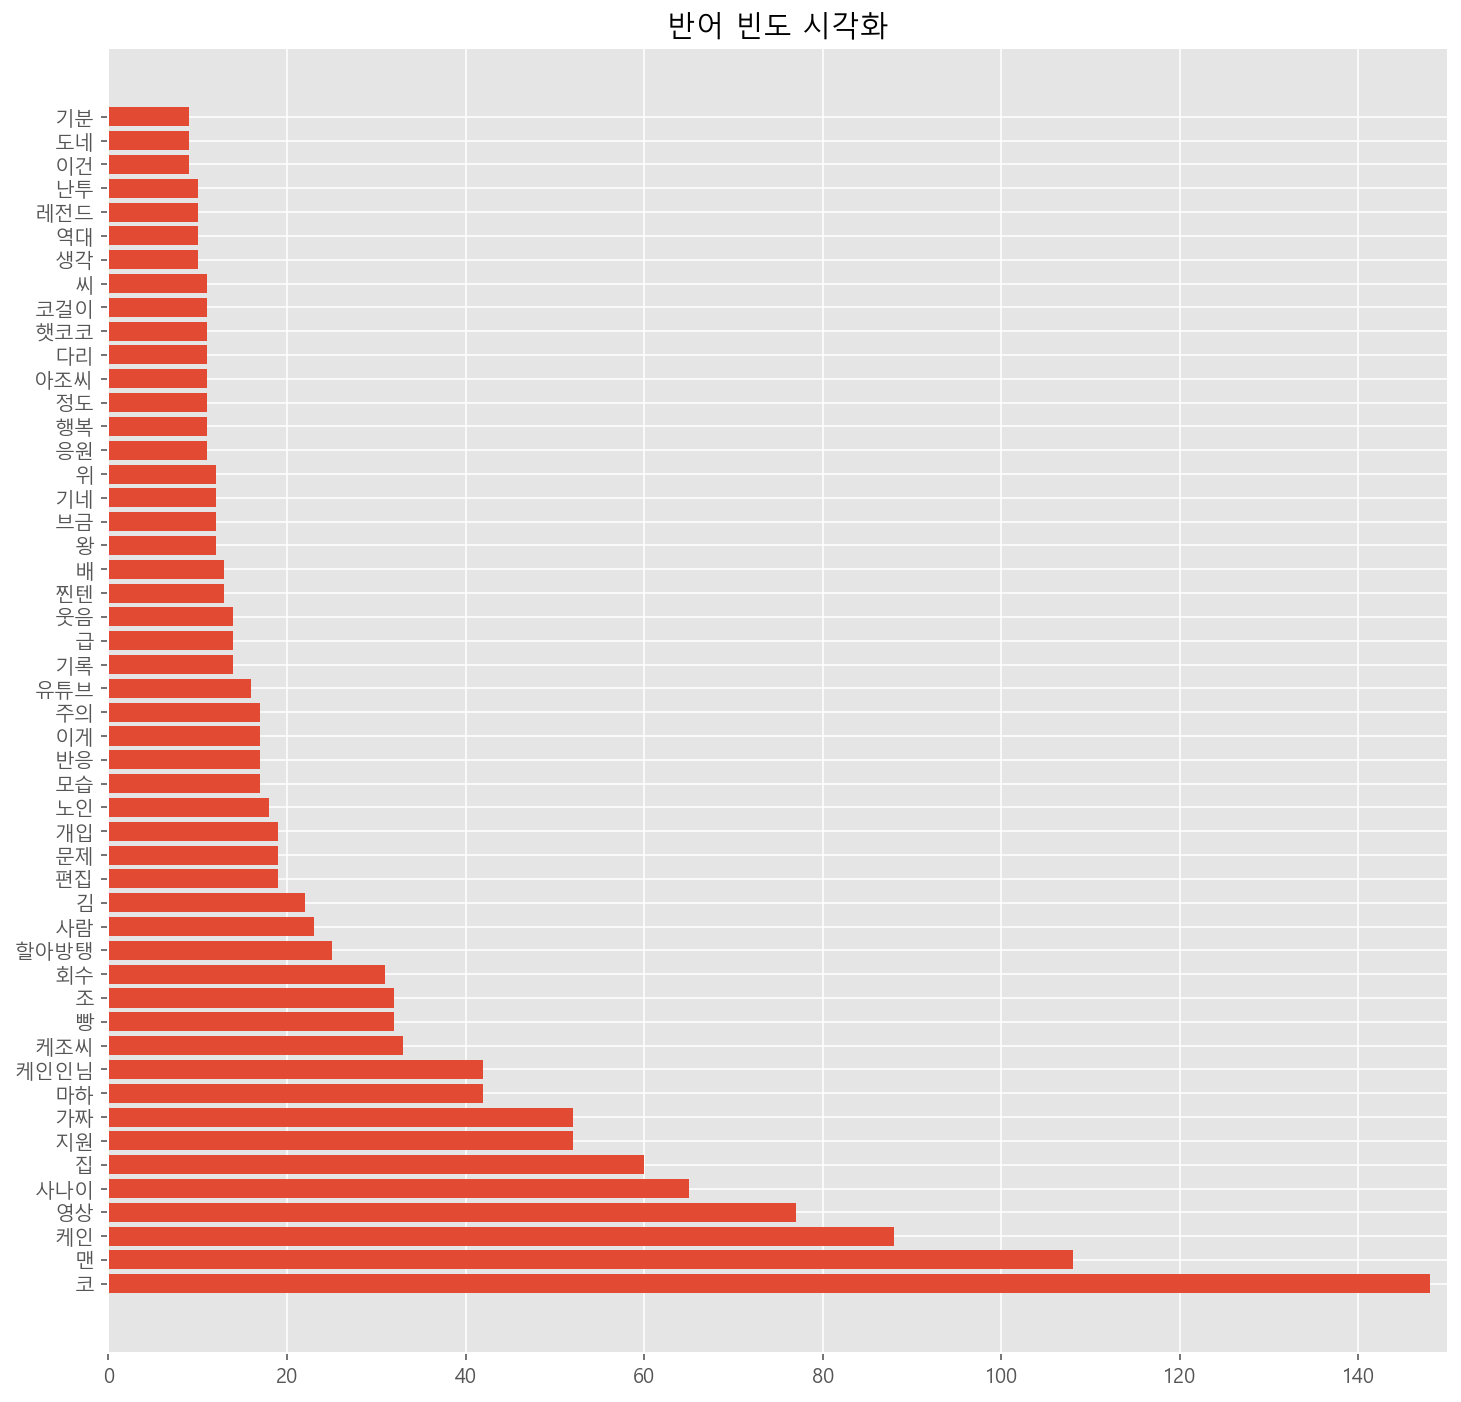

In [12]:
y_pos = np.arange(len(top_nouns))

plt.figure(figsize = (12, 12))
#sns.barplot(list(y_pos), list(unsorted_dict.values()), orient = 'h')  ## seabornÏùÄ value ÎÑ£Ïñ¥Ï§ÑÎïå listÌòïÌÉúÎ°ú ÎÑ£Ïñ¥Ï§òÏïºÌï®
plt.barh(y_pos, top_nouns.values())
plt.title('Î∞òÏñ¥ ÎπàÎèÑ ÏãúÍ∞ÅÌôî')
plt.yticks(y_pos, top_nouns.keys())
plt.xlim(0, 150)
plt.show()

- Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏ : "https://ichi.pro/ko/python-eulo-uimiissneun-dan-eo-guleum-saengseong-100630905917163"

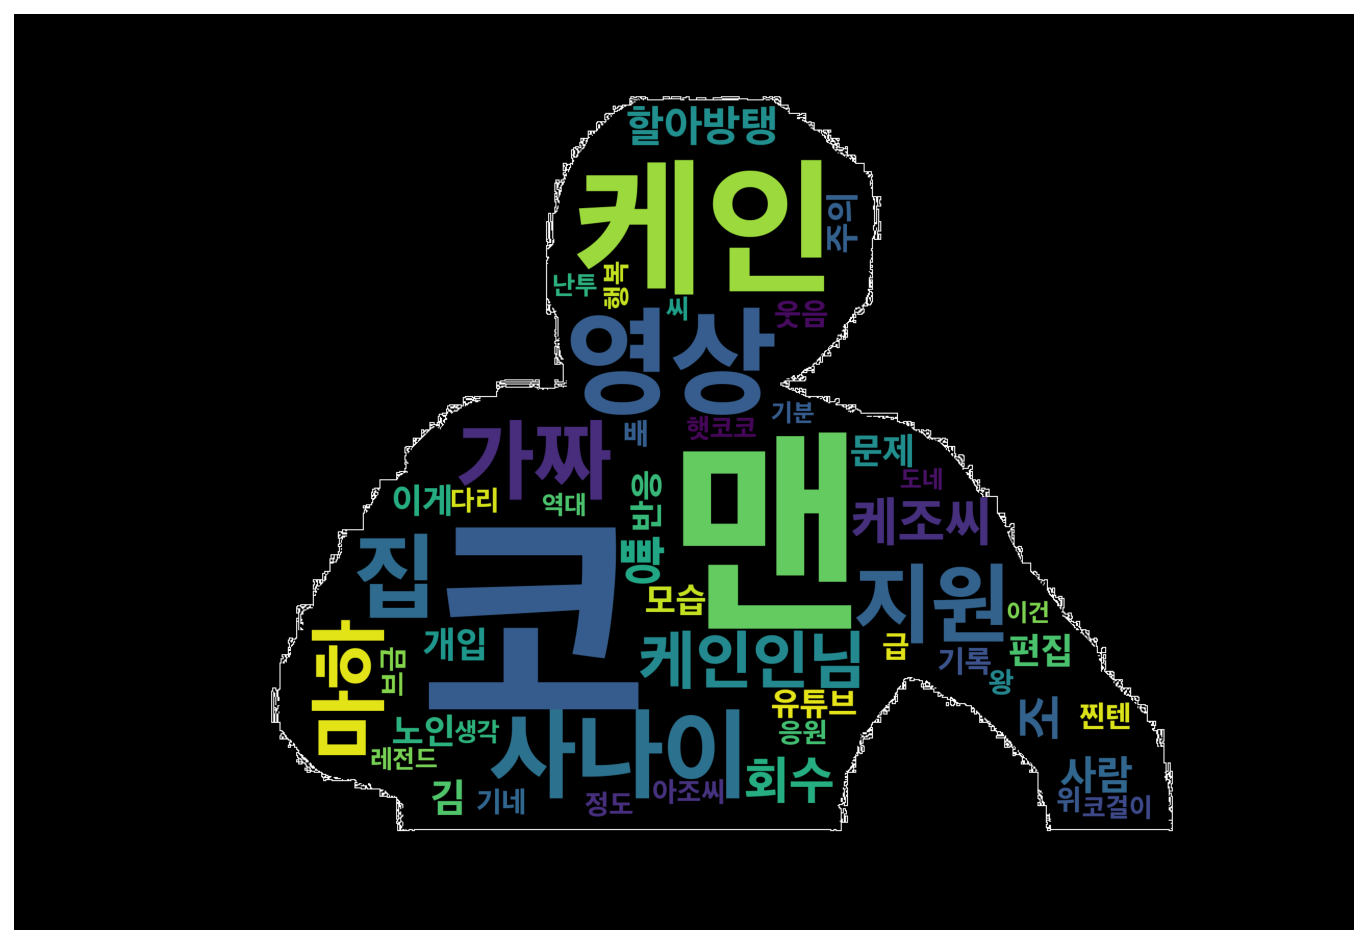

In [113]:
#############################################################
img = Image.open('C:/workspace/Img/dsds.jpg')
# 0ÏúºÎ°ú ÌëúÏãúÎêú Î∂ÄÎ∂ÑÏóê ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÍ∞Ä Í∑∏Î†§ÏßÄÍ≤å ÎêúÎã§.
img_array = np.array(img)

font_path = "C:/dd/AppleSDGothicNeoEB.ttf"

# WC ÏßÄÏ†ï
wc = WordCloud(font_path = font_path,
               max_font_size = 250,
               width = 1000,
               height = 1000,
               scale = 2.0,
               mask = img_array,
              contour_color = 'white',
              contour_width = 0.5).generate_from_frequencies(top_nouns)


# Ï∂úÎ†•
plt.figure(figsize = (12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

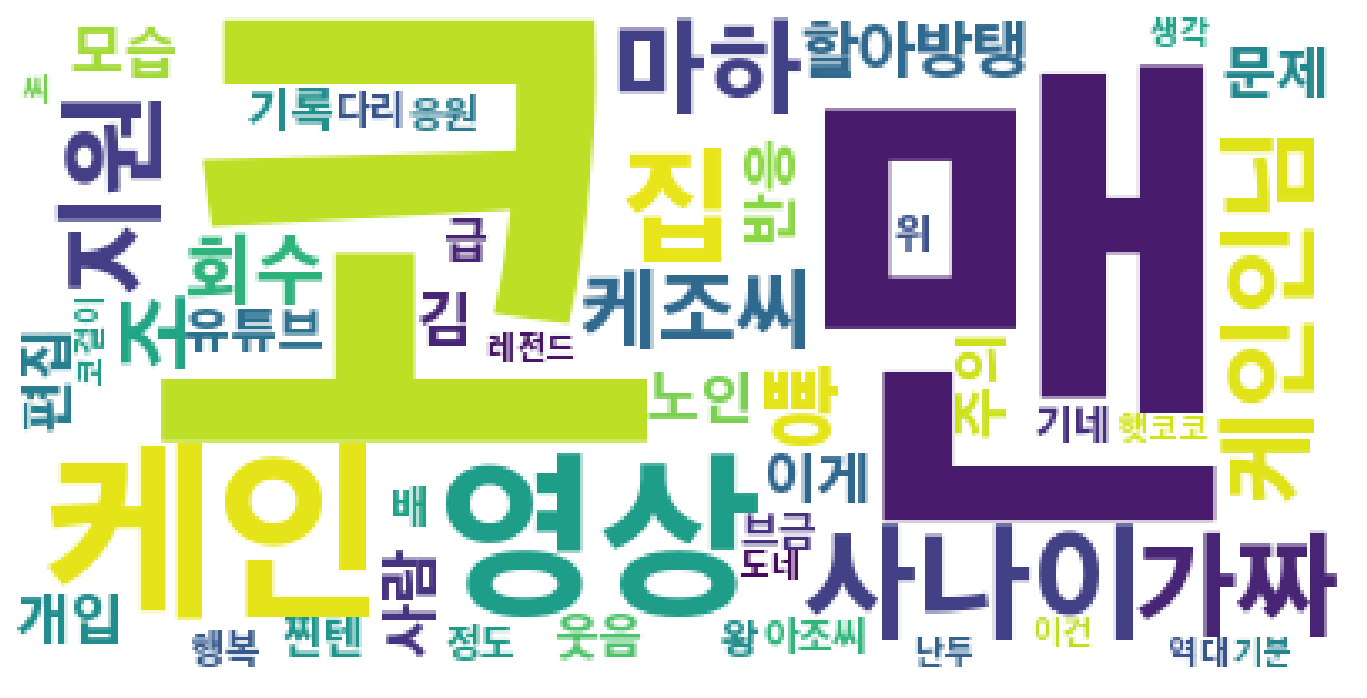

<AxesSubplot:>

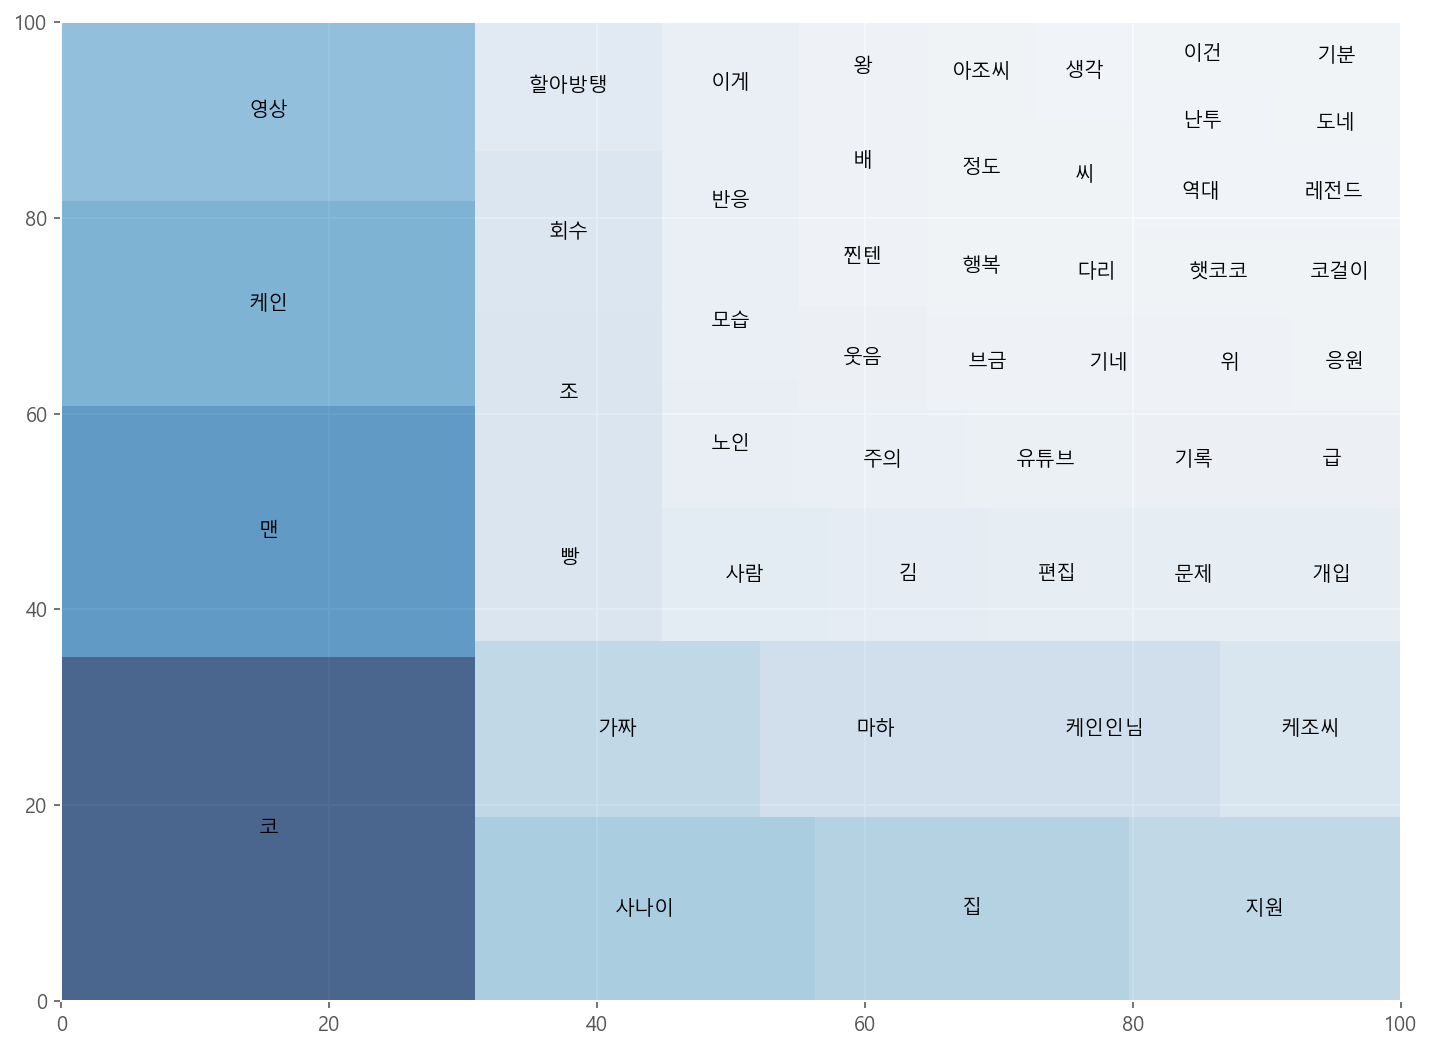

In [18]:
# Treemap
plt.figure(figsize = (12, 9))
norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                           vmax = max(top_nouns.values()))
colors = [plt.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label = top_nouns.keys(),
             sizes = top_nouns.values(),
             color = colors,
             alpha = .7)

- Ï†ÑÏ≤òÎ¶¨(Î∂àÏö©Ïñ¥ Ï∂îÍ∞Ä, Mecab ÏÇ¨Ï†ÑÏóê ÏÇ¨Ïö©Ïûê Îã®Ïñ¥ Ï∂îÍ∞Ä, Îì±) ÌõÑ, ÌäπÏßïÏÑ±Ïù¥ ÎöúÎ†∑Ìïú Îã®Ïñ¥Îì§Îßå ÎÇ®ÏïÑÏûàÎã§.

## Íµ∞ÏßëÎ∂ÑÏÑùCluster Analysis

### Word2Vec ÏÉùÏÑ±

In [36]:
tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")
comment = [tagger.nouns(x) for x in raw]

print(comment[:3])

[['ÌôòÍ∞ë', 'Ïó∞ÏÑ∏', 'ÎèÑÏ†Ñ', 'Î™®Ïäµ', 'ÏùëÏõê', 'Ïà´Ïûê', 'ÌÑ∞Î¨¥Îãà', 'Í≤å', 'Ìè¨'], ['ÏºÄÏ°∞Ïî®', 'Îπµ', 'Í±∞', 'ÏΩî', 'Ìï©ÏÑ±', 'ÏßÄÏõê', 'Í±∞'], ['ÏõÖÏû•', 'Î∞∞Í≤Ω', 'Î≤†', 'Ïß±', 'ÏûêÏÑ∏', 'ÌôîÎ©¥', 'Îì±Ïû•', 'ÏôÑÎ≤Ω']]


In [37]:
word2vec = Word2Vec(comment, min_count = 1)
word2vec

#### Similarity ÌôïÏù∏

In [58]:
word2vec.wv.most_similar('ÏºÄÏù∏Ïù∏Îãò')

[('Í≤É', 0.41585636138916016),
 ('ÏΩî', 0.39808401465415955),
 ('Î∞òÏùë', 0.3849949240684509),
 ('ÏºÄÏù∏', 0.3816394507884979),
 ('Îã¨ÏÑ±', 0.36598116159439087),
 ('ÎìúÎ¶Ω', 0.35755693912506104),
 ('Îß®', 0.3503376245498657),
 ('Î≤à', 0.3314947783946991),
 ('ÏÇ¨ÎÇòÏù¥', 0.31669148802757263),
 ('ÎÇúÌà¨', 0.30862298607826233)]

- Ïó≠Ïãú `ÏΩî` Ïùò similarityÍ∞Ä ÎßéÏùÄ Îã®Ïñ¥ÏóêÏÑú ÏÉÅÏúÑÍ∂åÏùÑ Ï∞®ÏßÄ

#### t-sneÎ•º Ïù¥Ïö©Ìïú Îã®Ïñ¥Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî

In [47]:
tsne = TSNE(n_components = 2)  ## 2Ï∞®ÏõêÏúºÎ°ú Ï∞®ÏõêÏàôÏÜå (Ï∞®Ïõê Ï∂ïÏÜå Í≤∞Í≥º ÏûÑÎ≤†Îî©ÎêòÎäî Ï∞®Ïõê)

vocab = list(word2vec.wv.index_to_key)
similarity = word2vec.wv[vocab]
similarity

array([[-0.00405241,  0.00542463,  0.00453763, ..., -0.01361584,
         0.00569802,  0.0040305 ],
       [-0.0108225 ,  0.00715247,  0.00495079, ..., -0.00608054,
        -0.00635972,  0.00301045],
       [-0.00207927,  0.00734619, -0.0074345 , ..., -0.00476917,
         0.01214968, -0.00949899],
       ...,
       [ 0.00146905,  0.00074824, -0.00848675, ..., -0.00090601,
        -0.00959698, -0.00933988],
       [ 0.00751824, -0.00567682, -0.00903254, ...,  0.00508827,
        -0.00674318,  0.00683645],
       [-0.00300728,  0.00757494,  0.00929911, ..., -0.00049348,
         0.00113007, -0.00536781]], dtype=float32)

In [49]:
transform_similarity = tsne.fit_transform(similarity)
xy_df = pd.DataFrame(transform_similarity, index = vocab, columns = ['x', 'y'])
xy_df[:10]

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


x          y
ÏΩî   -26.903648   6.154724
Í±∞   -12.670259  13.334405
Îß®   -27.436495   3.913135
ÎÇò   -27.308804   7.788432
ÏºÄÏù∏  -28.769901   2.479965
ÏòÅÏÉÅ  -27.090244   2.581627
ÏÇ¨ÎÇòÏù¥ -29.161999   4.546427
Ïßë   -24.117794  -2.313962
Í∞ÄÏßú  -27.230686   4.278511
ÏßÄÏõê    1.906527  21.843042

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


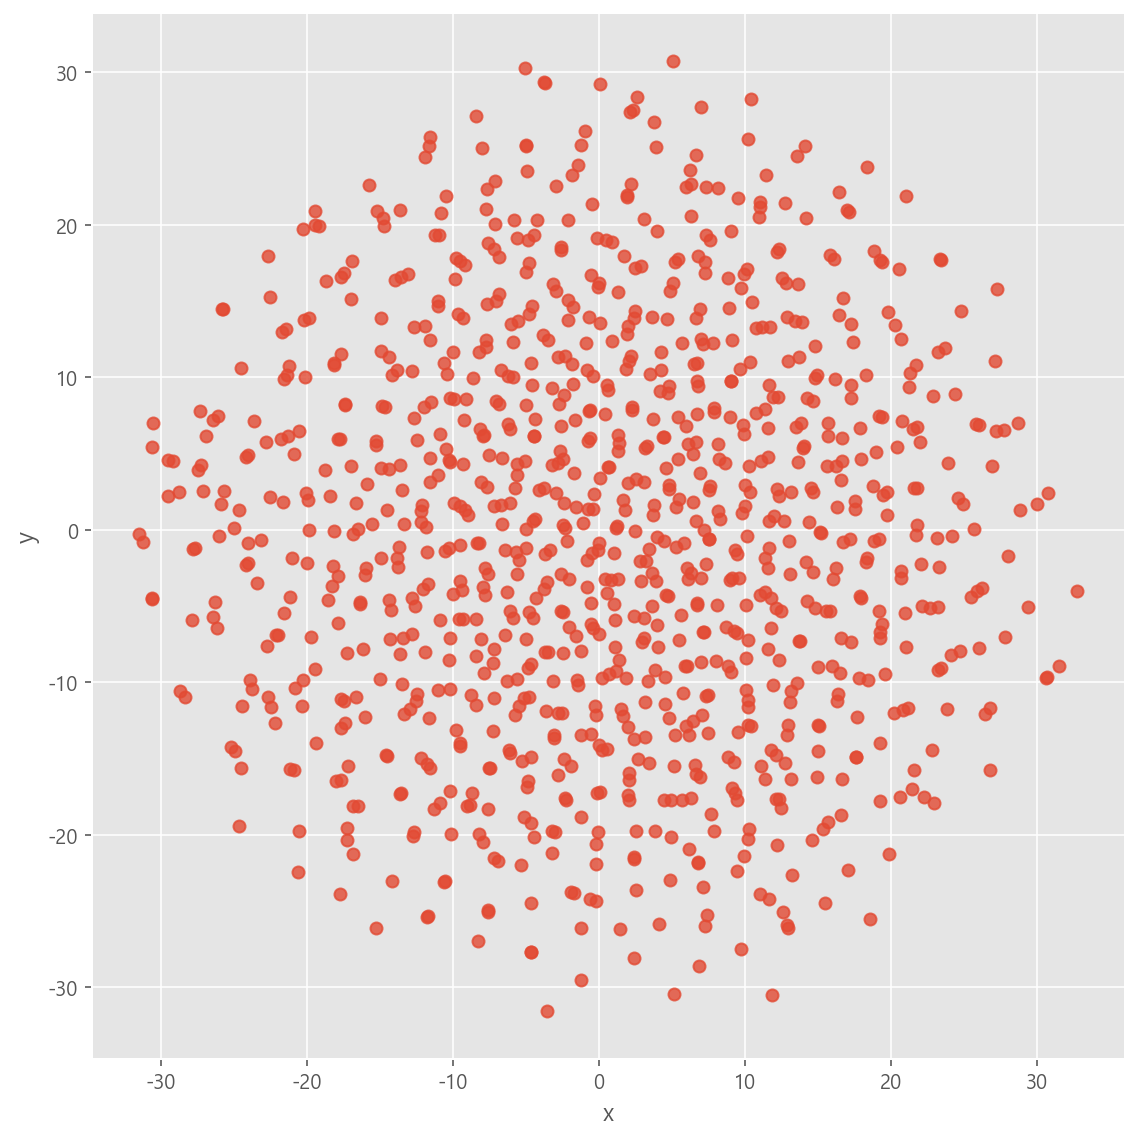

In [50]:
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8)
plt.show()

### Scikit-learnÏùÑ ÌôúÏö©Ìïú Í≥ÑÏ∏µÏ†Å Íµ∞ÏßëÌôî

#### ward

In [62]:
ward = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
pred = ward.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

x          y  predict
ÏΩî   -26.903648   6.154724        0
Í±∞   -12.670259  13.334405        1
Îß®   -27.436495   3.913135        0
ÎÇò   -27.308804   7.788432        0
ÏºÄÏù∏  -28.769901   2.479965        0
ÏòÅÏÉÅ  -27.090244   2.581627        0
ÏÇ¨ÎÇòÏù¥ -29.161999   4.546427        0
Ïßë   -24.117794  -2.313962        0
Í∞ÄÏßú  -27.230686   4.278511        0
ÏßÄÏõê    1.906527  21.843042        1

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


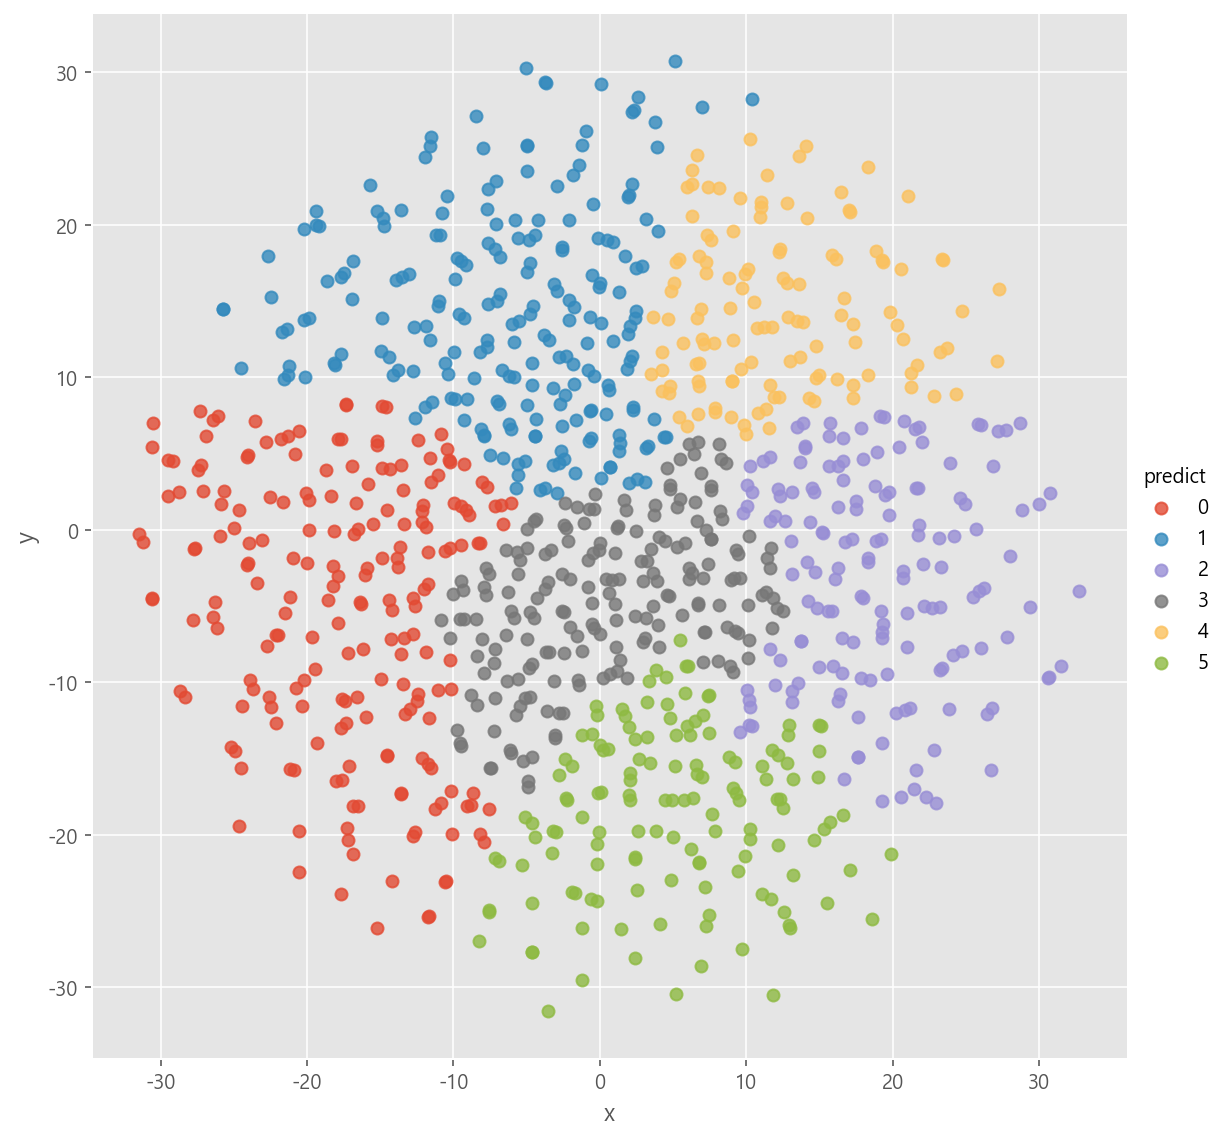

In [63]:
# ÏãúÍ∞ÅÌôî
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### average

In [64]:
average = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
pred = average.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

x          y  predict
ÏΩî   -26.903648   6.154724        1
Í±∞   -12.670259  13.334405        0
Îß®   -27.436495   3.913135        1
ÎÇò   -27.308804   7.788432        1
ÏºÄÏù∏  -28.769901   2.479965        1
ÏòÅÏÉÅ  -27.090244   2.581627        1
ÏÇ¨ÎÇòÏù¥ -29.161999   4.546427        1
Ïßë   -24.117794  -2.313962        1
Í∞ÄÏßú  -27.230686   4.278511        1
ÏßÄÏõê    1.906527  21.843042        0

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


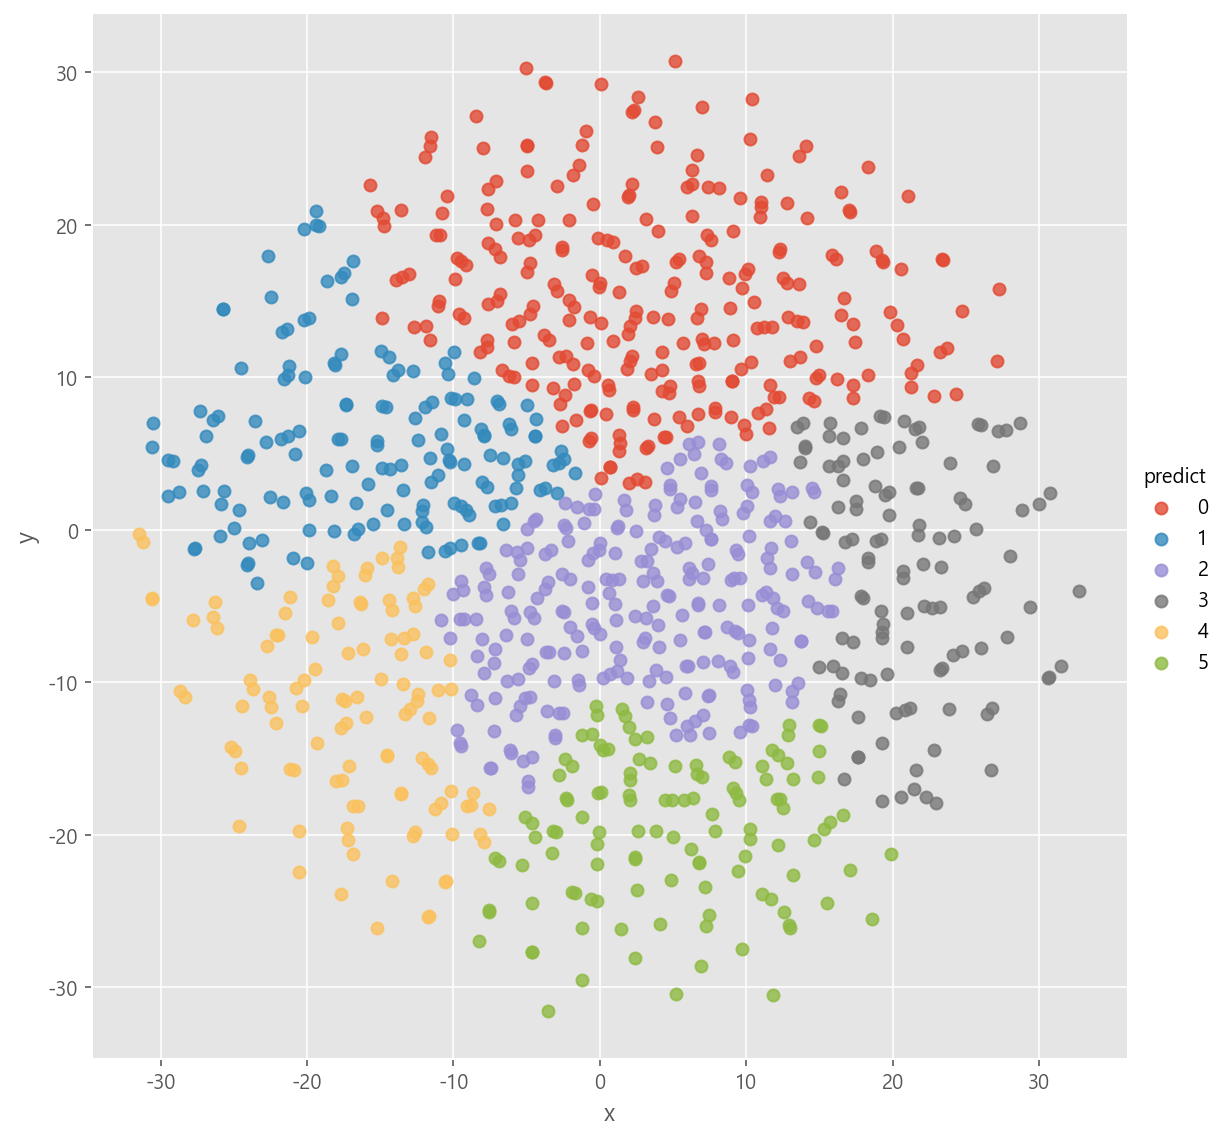

In [65]:
# ÏãúÍ∞ÅÌôî
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### complete.

In [66]:
complete = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
pred = complete.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

x          y  predict
ÏΩî   -26.903648   6.154724        0
Í±∞   -12.670259  13.334405        2
Îß®   -27.436495   3.913135        0
ÎÇò   -27.308804   7.788432        0
ÏºÄÏù∏  -28.769901   2.479965        0
ÏòÅÏÉÅ  -27.090244   2.581627        0
ÏÇ¨ÎÇòÏù¥ -29.161999   4.546427        0
Ïßë   -24.117794  -2.313962        0
Í∞ÄÏßú  -27.230686   4.278511        0
ÏßÄÏõê    1.906527  21.843042        2

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


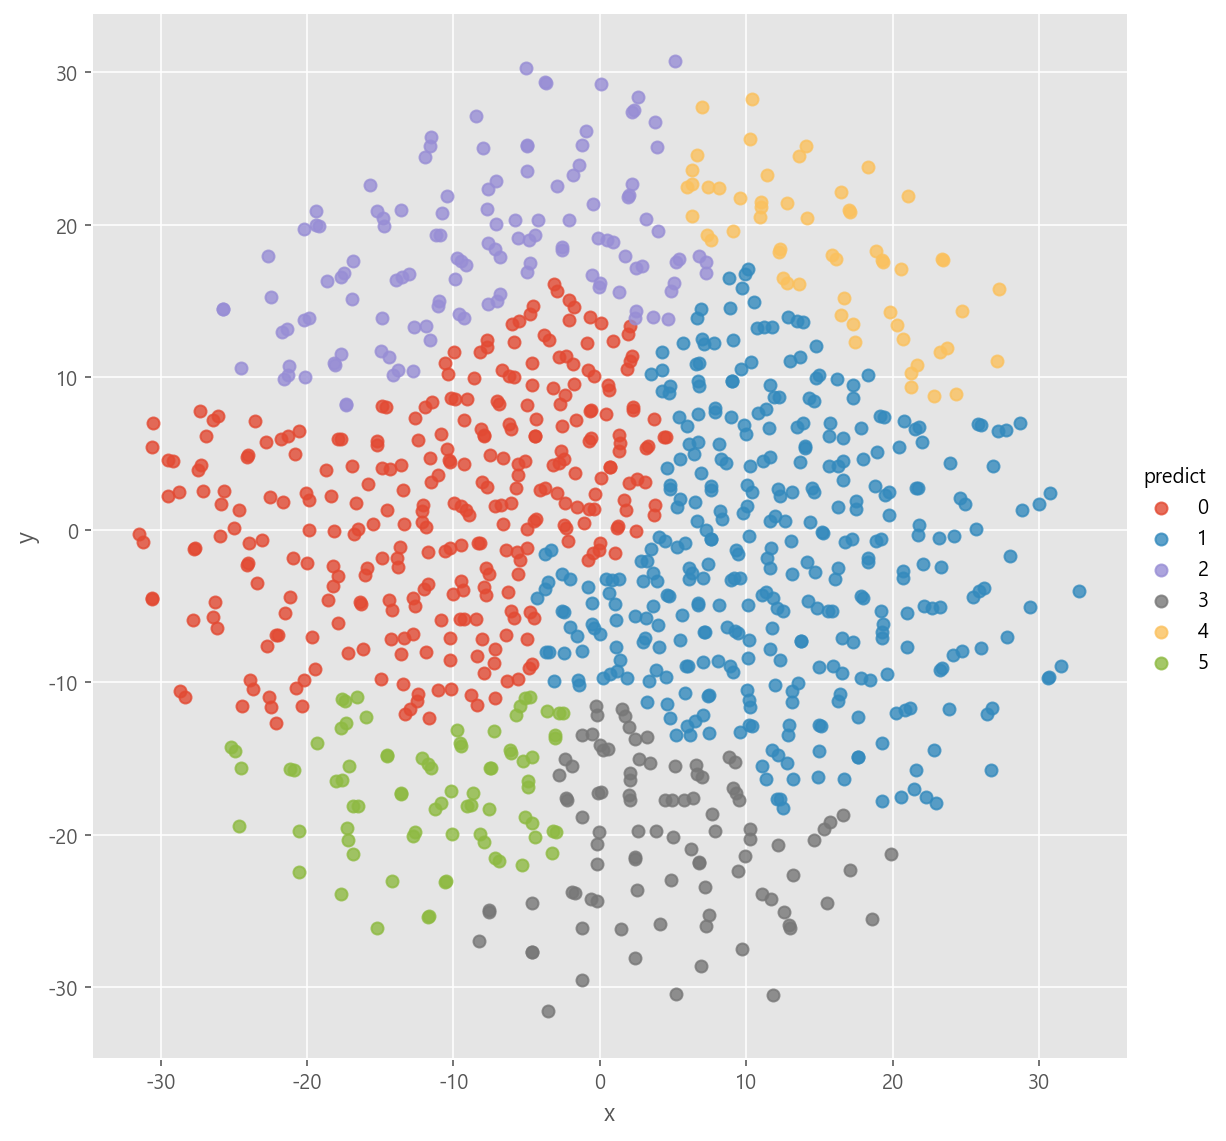

In [67]:
# ÏãúÍ∞ÅÌôî
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

### Scipy
- `scipy`Î•º Ïù¥Ïö©Ìïú Í±∞Î¶¨ÏÇ¨Ïö©Í≥º word2vec ÏÇ¨Ïö©ÏùÑ ÎπÑÍµê
- `pdist`Î•º Ïù¥Ïö©Ìïú Í∞Å Îã®Ïñ¥Í∞Ñ Ïú†ÌÅ¥Î¶¨ÎîîÏïà Í±∞Î¶¨ Í≥ÑÏÇ∞

#### euclidean

In [69]:
dismatrix = pdist(xy_df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(dismatrix))
row_dist

0          1          2          3          4          5     \
0      0.000000  16.066648   2.304049   1.683197   4.121498   3.577966   
1     16.066648   0.000000  17.629578  15.781153  19.519665  18.098569   
2      2.304049  17.629578   0.000000   3.877400   1.957537   1.375792   
3      1.683197  15.781153   3.877400   0.000000   5.505872   5.211390   
4      4.121498  19.519665   1.957537   5.505872   0.000000   1.682731   
...         ...        ...        ...        ...        ...        ...   
1022  31.424573  33.512436  29.894220  33.003188  29.584557  28.636263   
1023  28.313963  16.124512  28.900789  28.789615  30.351538  28.670761   
1024  26.838557  31.778801  25.062038  28.473394  24.456365  23.746047   
1025  21.293077  19.554051  20.585642  22.574962  21.167543  19.676747   
1026  26.327318  13.364473  27.095780  26.675845  28.650866  26.983047   

           6          7          8          9     ...       1017       1018  \
0      2.772502   8.915134   1.904502  32.865629  ...  46.549915  26.777872   
1     18.793776  19.491470  17.263118  16.878377  ...  30.756763  12.834787   
2      1.838048   7.056239   0.419353  34.445530  ...  47.799878  27.716616   
3      3.734291  10.594380   3.510790  32.481805  ...  46.448584  26.990913   
4      2.103332   6.680107   2.367266  36.331419  ...  49.556751  29.356301   
...         ...        ...        ...        ...  ...        ...        ...   
1022  31.416123  23.053328  30.069159  43.593548  ...  49.032706  31.958922   
1023  30.592032  26.762417  28.674575  16.244372  ...  22.130255   4.721049   
1024  26.402693  18.205822  25.295080  44.052124  ...  51.393914  32.804896   
1025  22.406969  15.228897  20.581377  29.915642  ...  37.713797  18.219653   
1026  28.723336  25.602928  26.840703  14.329322  ...  22.306763   2.212511   

           1019       1020       1021       1022       1023       1024  \
0     17.169593  21.062039  17.013781  31.424573  28.313963  26.838557   
1     28.976988   7.477096   4.331863  33.512436  16.124512  31.778801   
2     14.895107  22.108039  18.185307  29.894220  28.900789  25.062038   
3     18.771286  21.218559  17.097569  33.003188  28.789615  28.473394   
4     13.440824  23.811504  19.953564  29.584557  30.351538  24.456365   
...         ...        ...        ...        ...        ...        ...   
1022  20.917226  30.736284  30.602160   0.000000  28.592306   6.627408   
1023  34.111786   8.802808  12.629265  28.592306   0.000000  30.196403   
1024  14.703526  30.423242  29.392356   6.627408  30.196403   0.000000   
1025  19.726585  16.243247  16.102405  15.006556  15.750443  15.058190   
1026  33.508957   6.019746  10.036538  29.829411   2.966235  30.823377   

           1025       1026  
0     21.293077  26.327318  
1     19.554051  13.364473  
2     20.585642  27.095780  
3     22.574962  26.675845  
4     21.167543  28.650866  
...         ...        ...  
1022  15.006556  29.829411  
1023  15.750443   2.966235  
1024  15.058190  30.823377  
1025   0.000000  16.215379  
1026  16.215379   0.000000  

[1027 rows x 1027 columns]

#### dendrogram

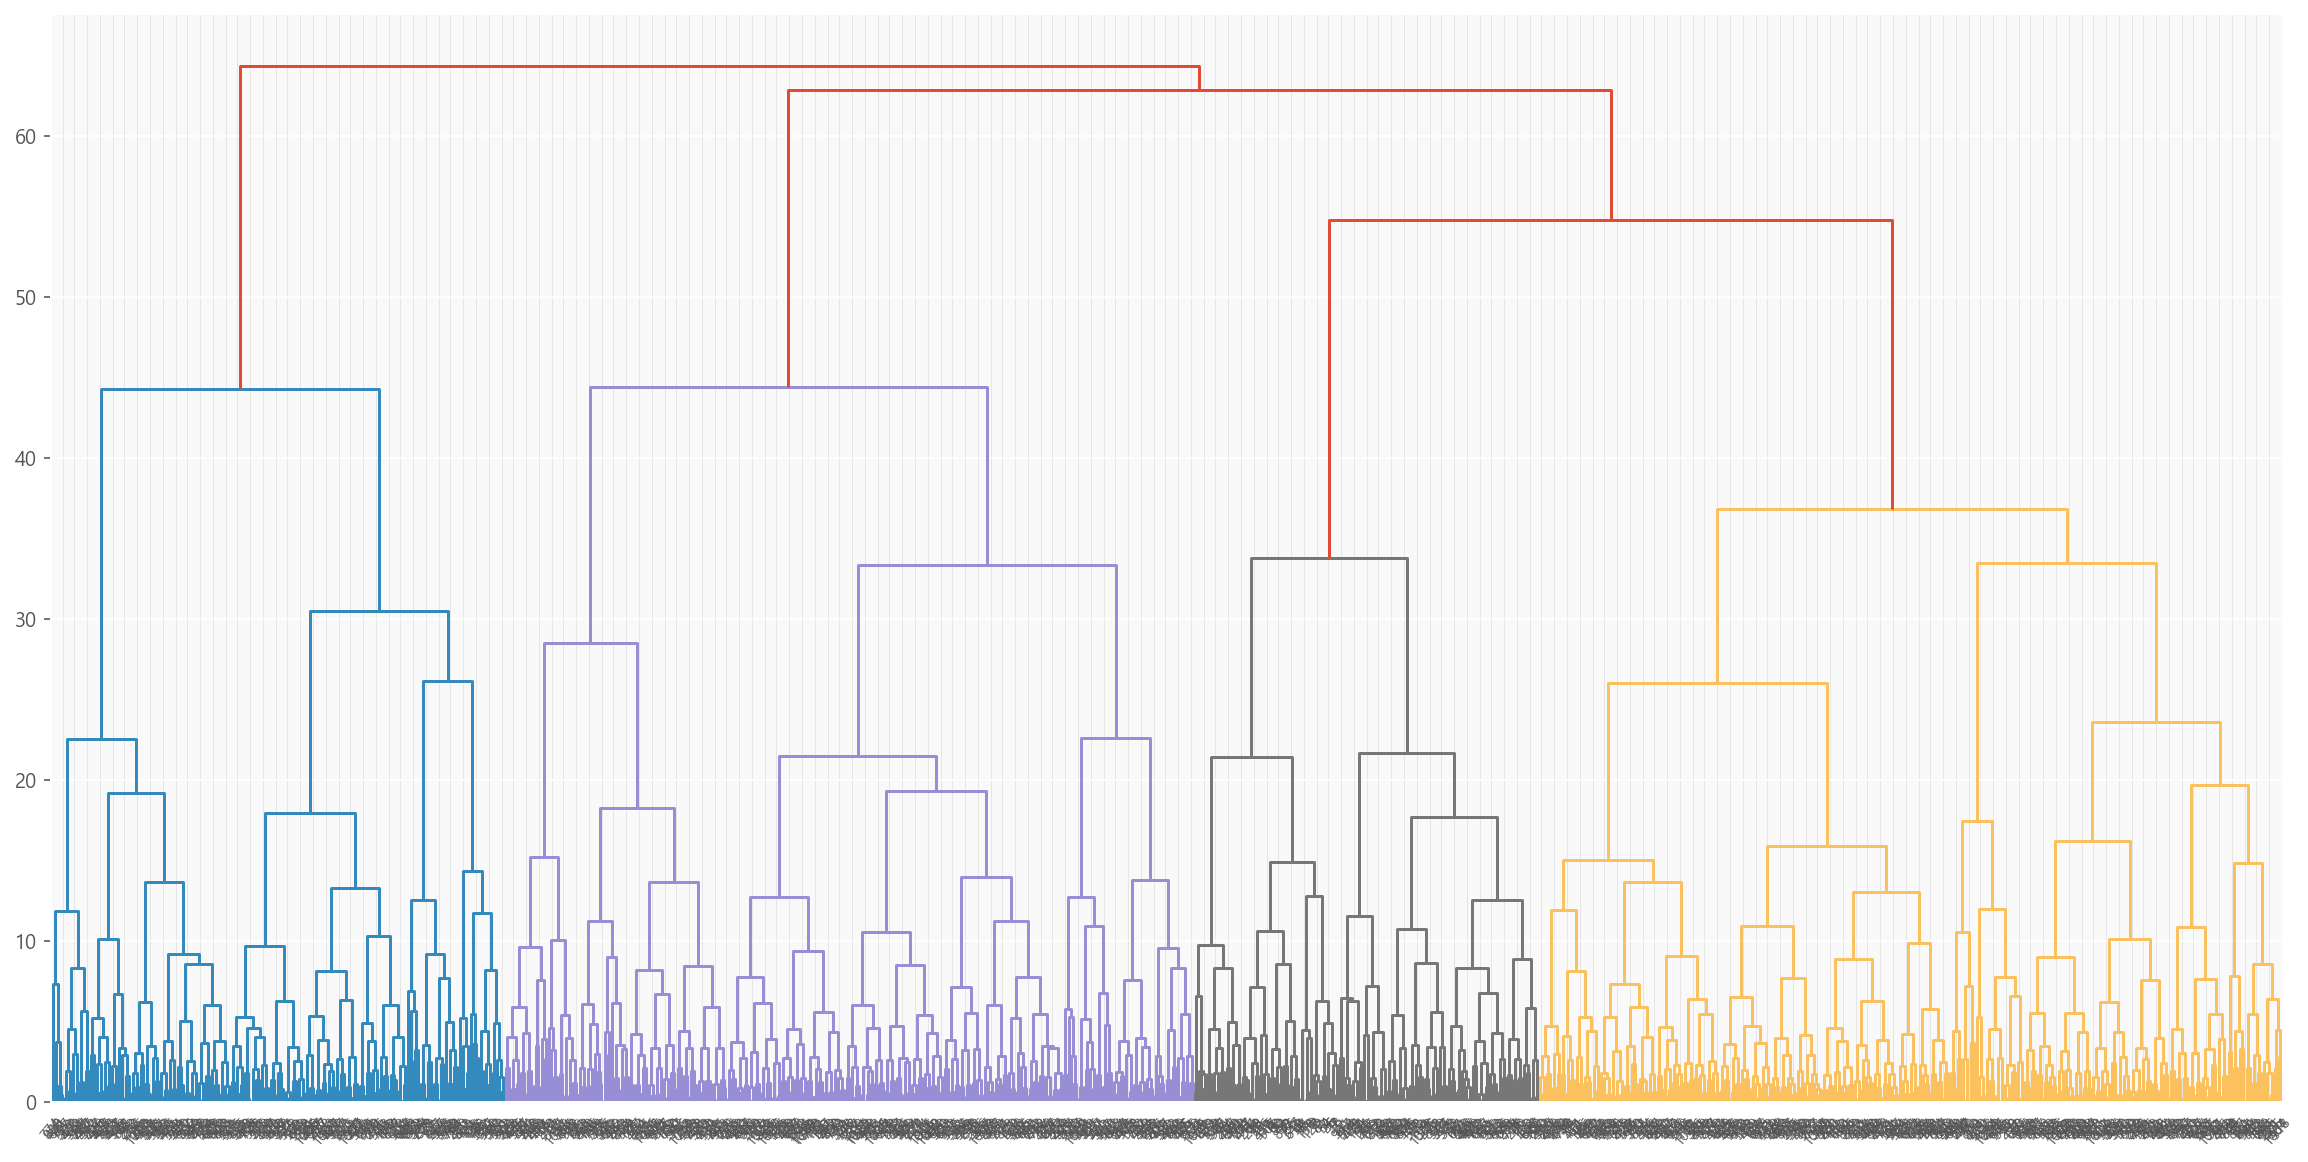

In [71]:
# Ïú†ÌÅ¥Î¶¨ÎîîÏïà Í±∞Î¶¨Î•º Ïù¥Ïö©Ìïú Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
row_clusters = linkage(dismatrix, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(Z = row_clusters,
          leaf_rotation = 50,
          leaf_font_size = 7)

plt.show()

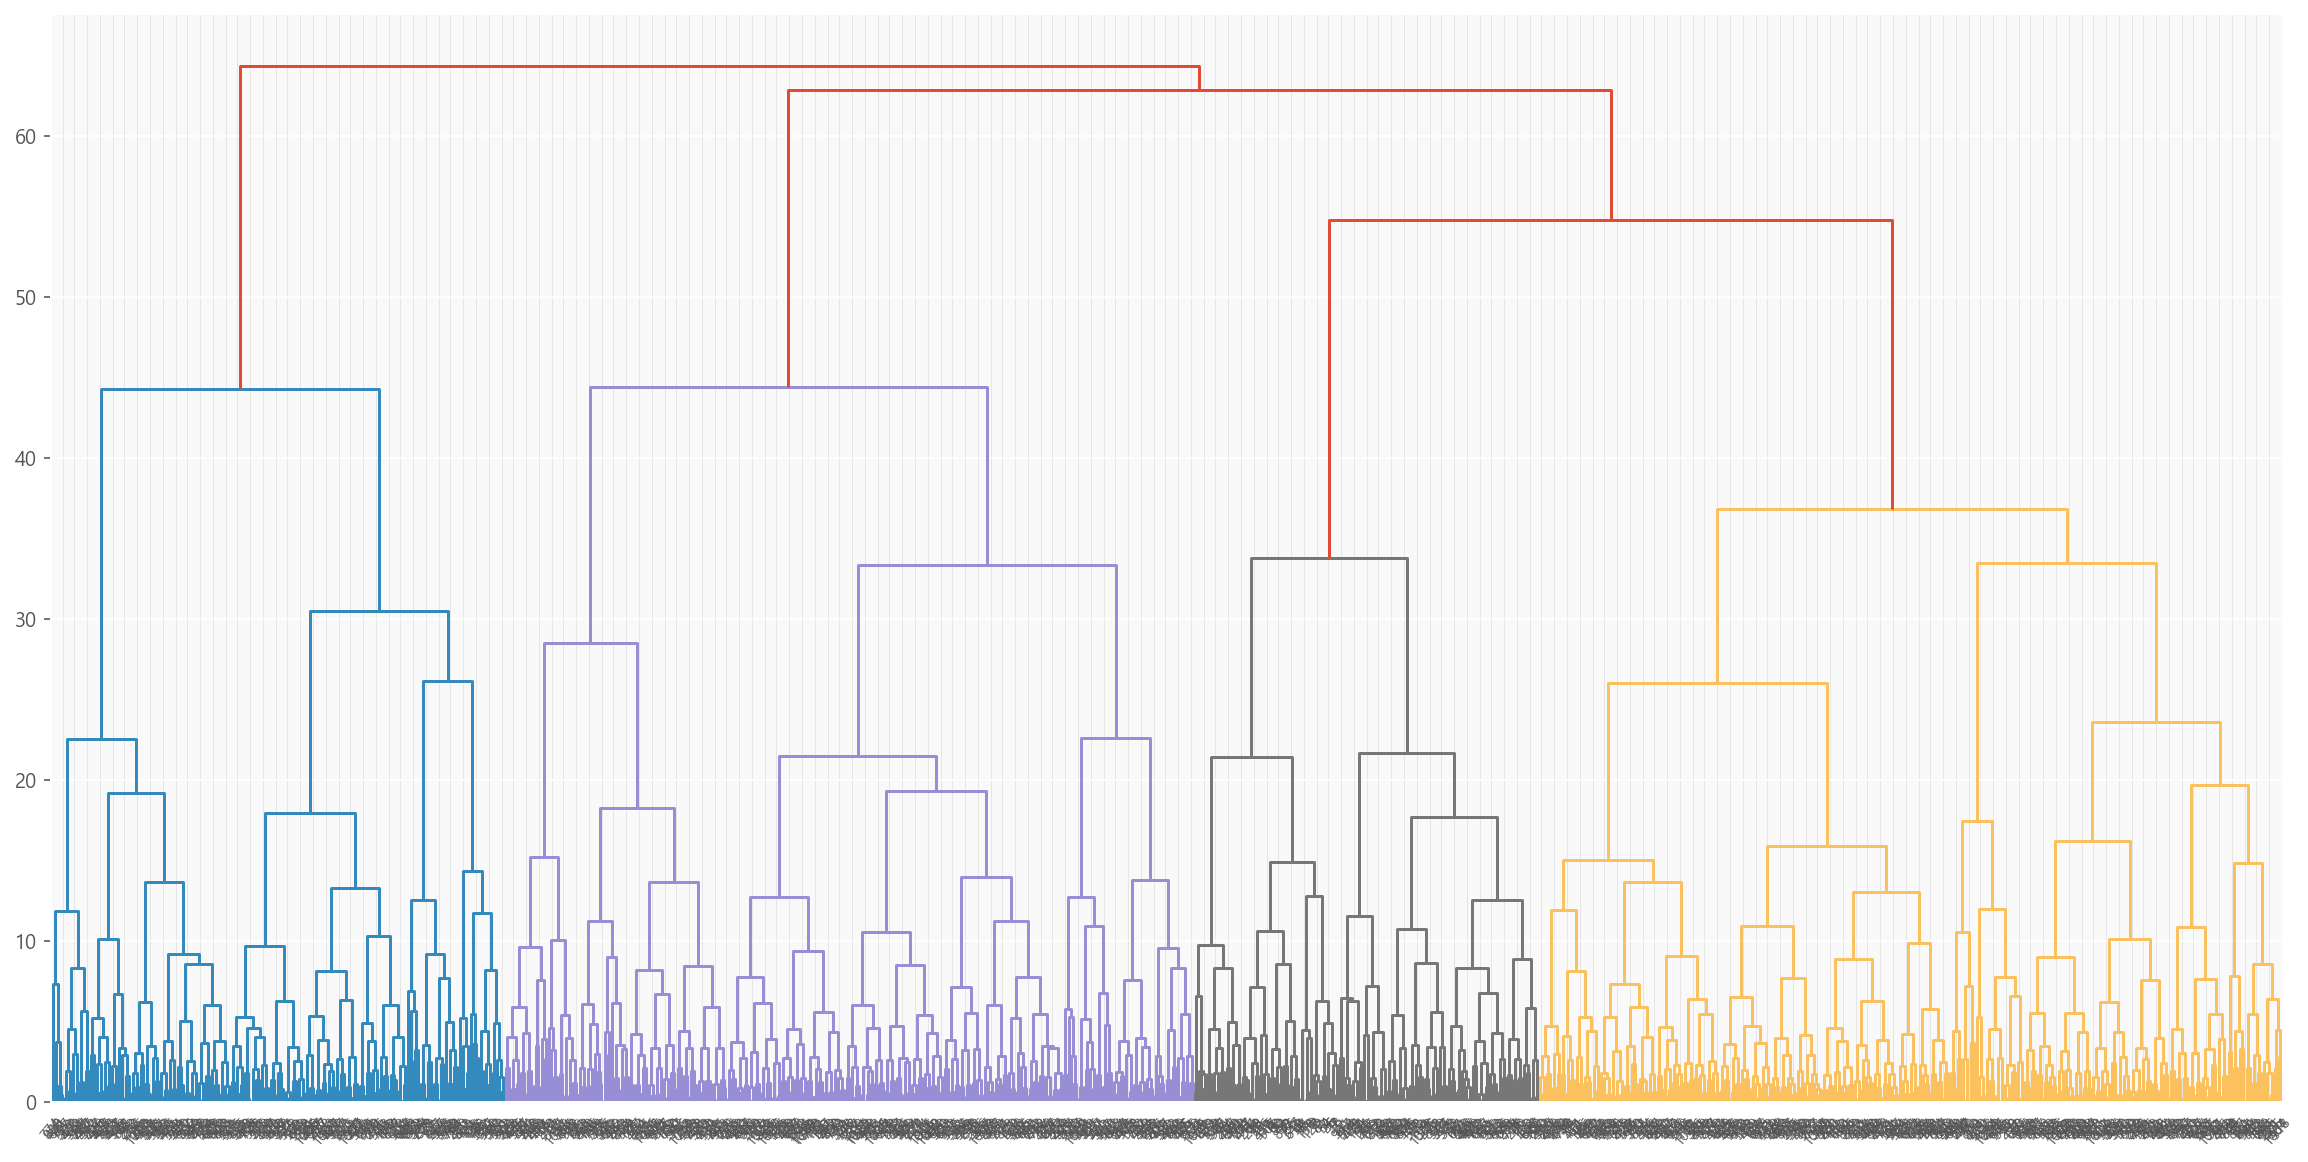

In [72]:
# word2vecÏùÑ Ïù¥Ïö©Ìïú Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
mm = linkage(xy_df, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(Z = mm, leaf_rotation = 50, leaf_font_size = 7)
plt.show()

### ÎπÑÍ≥ÑÏ∏µÏ†Å Íµ∞ÏßëÌôî

In [75]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ 3Í∞ú
kmeans = KMeans(n_clusters = 3)
pred = kmeans.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

x          y  predict
ÏΩî   -26.903648   6.154724        2
Í±∞   -12.670259  13.334405        2
Îß®   -27.436495   3.913135        2
ÎÇò   -27.308804   7.788432        2
ÏºÄÏù∏  -28.769901   2.479965        2
ÏòÅÏÉÅ  -27.090244   2.581627        2
ÏÇ¨ÎÇòÏù¥ -29.161999   4.546427        2
Ïßë   -24.117794  -2.313962        2
Í∞ÄÏßú  -27.230686   4.278511        2
ÏßÄÏõê    1.906527  21.843042        0

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


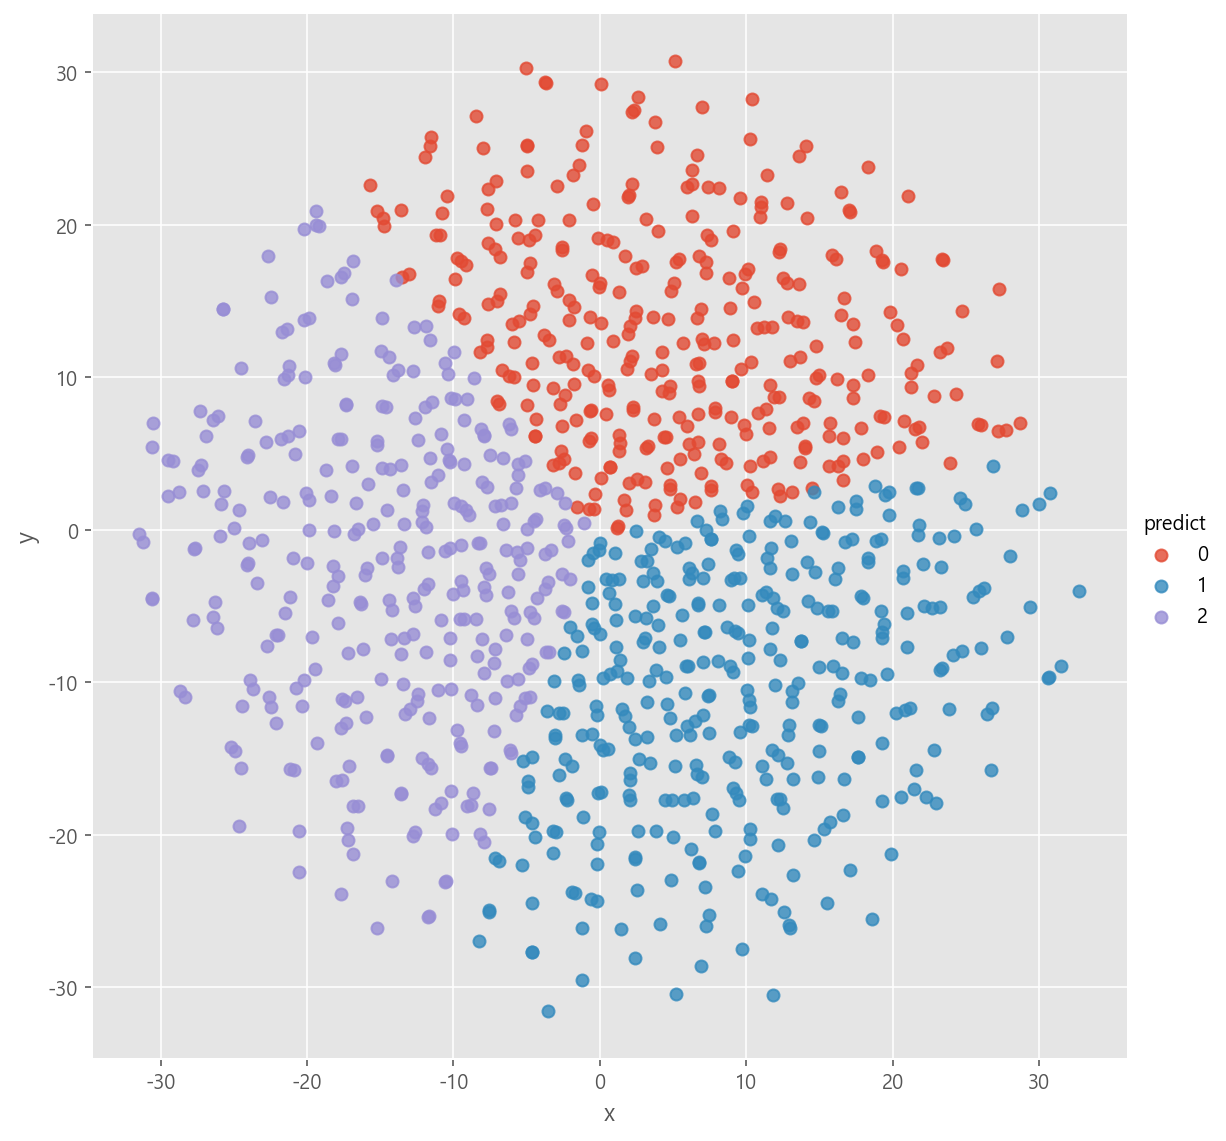

In [77]:
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

In [78]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ 5Í∞ú
kmeans = KMeans(n_clusters = 5)
pred = kmeans.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

x          y  predict
ÏΩî   -26.903648   6.154724        2
Í±∞   -12.670259  13.334405        0
Îß®   -27.436495   3.913135        2
ÎÇò   -27.308804   7.788432        2
ÏºÄÏù∏  -28.769901   2.479965        2
ÏòÅÏÉÅ  -27.090244   2.581627        2
ÏÇ¨ÎÇòÏù¥ -29.161999   4.546427        2
Ïßë   -24.117794  -2.313962        2
Í∞ÄÏßú  -27.230686   4.278511        2
ÏßÄÏõê    1.906527  21.843042        0

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


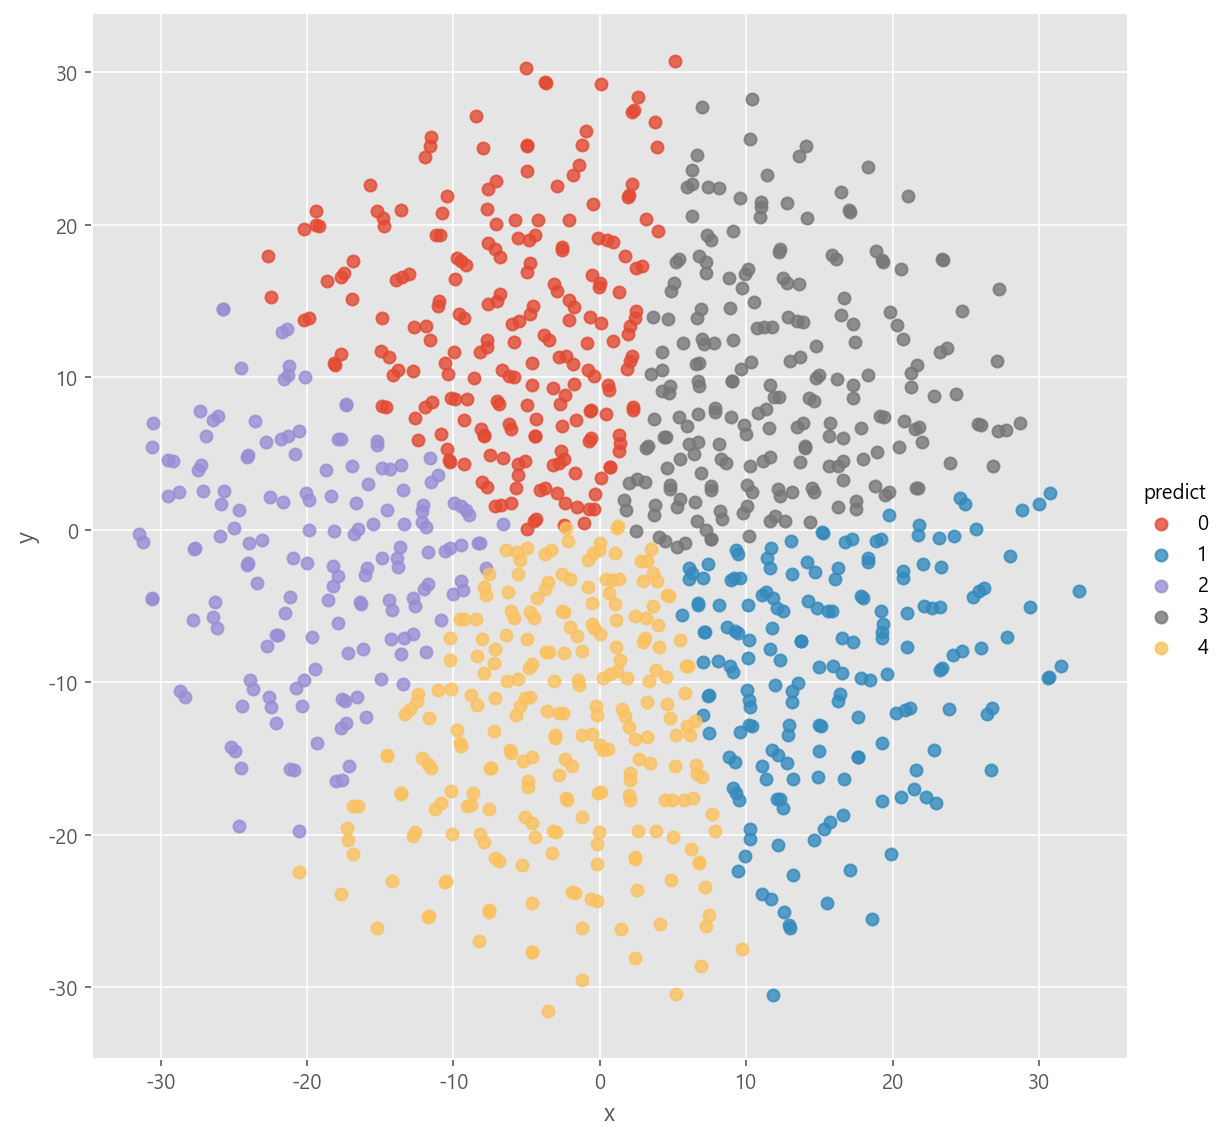

In [79]:
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

## GensimÏùÑ Ïù¥Ïö©Ìïú Word2Vec

### CBOW

In [132]:
comment[:4]

[['ÌôòÍ∞ë', 'Ïó∞ÏÑ∏', 'ÎèÑÏ†Ñ', 'Î™®Ïäµ', 'ÏùëÏõê', 'Ïà´Ïûê', 'ÌÑ∞Î¨¥Îãà', 'Í≤å', 'Ìè¨'],
 ['ÏºÄÏ°∞Ïî®', 'Îπµ', 'Í±∞', 'ÏΩî', 'Ìï©ÏÑ±', 'ÏßÄÏõê', 'Í±∞'],
 ['ÏõÖÏû•', 'Î∞∞Í≤Ω', 'Î≤†', 'Ïß±', 'ÏûêÏÑ∏', 'ÌôîÎ©¥', 'Îì±Ïû•', 'ÏôÑÎ≤Ω'],
 []]

In [121]:
model_cbow = Word2Vec(sentences = comment, window = 4, vector_size = 100, min_count = 5, workers = 4, sg = 0)

In [124]:
model_cbow.wv.similarity('ÏΩî', 'ÏºÄÏù∏')

0.51405776

In [125]:
model_cbow.wv.most_similar(positive = ['ÏΩî'])

[('Í∞ÄÏßú', 0.630085825920105),
 ('ÏÇ¨ÎÇòÏù¥', 0.6111522912979126),
 ('Î≤à', 0.5952463746070862),
 ('Ï†Ä', 0.5430737733840942),
 ('ÏºÄÏ°∞Ïî®', 0.5319321751594543),
 ('Îß®', 0.526379406452179),
 ('ÎÇú', 0.5195410847663879),
 ('ÏºÄÏù∏', 0.5140578150749207),
 ('Î¨∏Ï†ú', 0.5020383596420288),
 ('ÏòÅÏÉÅ', 0.5015293955802917)]

In [129]:
model_cbow.wv.most_similar(positive = ['ÏºÄÏ°∞Ïî®', 'ÏïÑÏ°∞Ïî®'], negative = ['ÏΩî'])

[('Í±∏', 0.32366040349006653),
 ('Îßå', 0.30450841784477234),
 ('ÏÇ¨ÎÇòÏù¥', 0.2856577932834625),
 ('ÏºÄÏù∏', 0.2736532986164093),
 ('ÏΩîÌä∏', 0.2622238099575043),
 ('Í∏∞Î∂Ñ', 0.26149994134902954),
 ('ÌÅ¨Í∏∞', 0.24830171465873718),
 ('ÎìØ', 0.24542757868766785),
 ('Í∑πÏ∞¨', 0.24410581588745117),
 ('ÏïåÍ≥†Î¶¨Ï¶ò', 0.24186621606349945)]

### Skip-gram

In [133]:
model_skip_gram = Word2Vec(sentences = comment, window = 4, vector_size = 100, min_count = 5, workers = 4, sg = 1)

In [134]:
model_skip_gram.wv.similarity('ÏΩî', 'ÏºÄÏ°∞Ïî®')

0.90677667

In [135]:
model_skip_gram.wv.most_similar(positive = ['ÏºÄÏ°∞Ïî®', 'ÏïÑÏ°∞Ïî®'], negative = ['ÏΩî'])

[('ÏÇ¨ÎÇòÏù¥', 0.8090552091598511),
 ('ÏºÄÏù∏', 0.8051620125770569),
 ('Îßå', 0.8014136552810669),
 ('ÏòÅÏÉÅ', 0.7901595234870911),
 ('Î≤à', 0.7844853401184082),
 ('Í±∏', 0.7787500023841858),
 ('Îß®', 0.7751374244689941),
 ('Í∞ÄÏßú', 0.7749748826026917),
 ('Ï°∞', 0.7744613289833069),
 ('ÎÑà', 0.7727957963943481)]

### Embedding Vector ÏãúÍ∞ÅÌôî

In [137]:
model_skip_gram.wv.save_word2vec_format('kane_w2v')

#### metadata.tsvÏôÄ tensor.tsv Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [138]:
!python -m gensim.scripts.word2vec2tensor -i kane_w2v -o kane_w2v

2021-12-28 16:17:33,805 - word2vec2tensor - INFO - running C:\Users\User\anaconda3\envs\nlp\lib\site-packages\gensim\scripts\word2vec2tensor.py -i kane_w2v -o kane_w2v
2021-12-28 16:17:33,805 - keyedvectors - INFO - loading projection weights from kane_w2v
2021-12-28 16:17:33,826 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (156, 100) matrix of type float32 from kane_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-12-28T16:17:33.820685', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'load_word2vec_format'}
2021-12-28 16:17:33,835 - word2vec2tensor - INFO - 2D tensor file saved to kane_w2v_tensor.tsv
2021-12-28 16:17:33,835 - word2vec2tensor - INFO - Tensor metadata file saved to kane_w2v_metadata.tsv
2021-12-28 16:17:33,835 - word2vec2tensor - INFO - finished running word2vec2tensor.py


- https://projector.tensorflow.org/

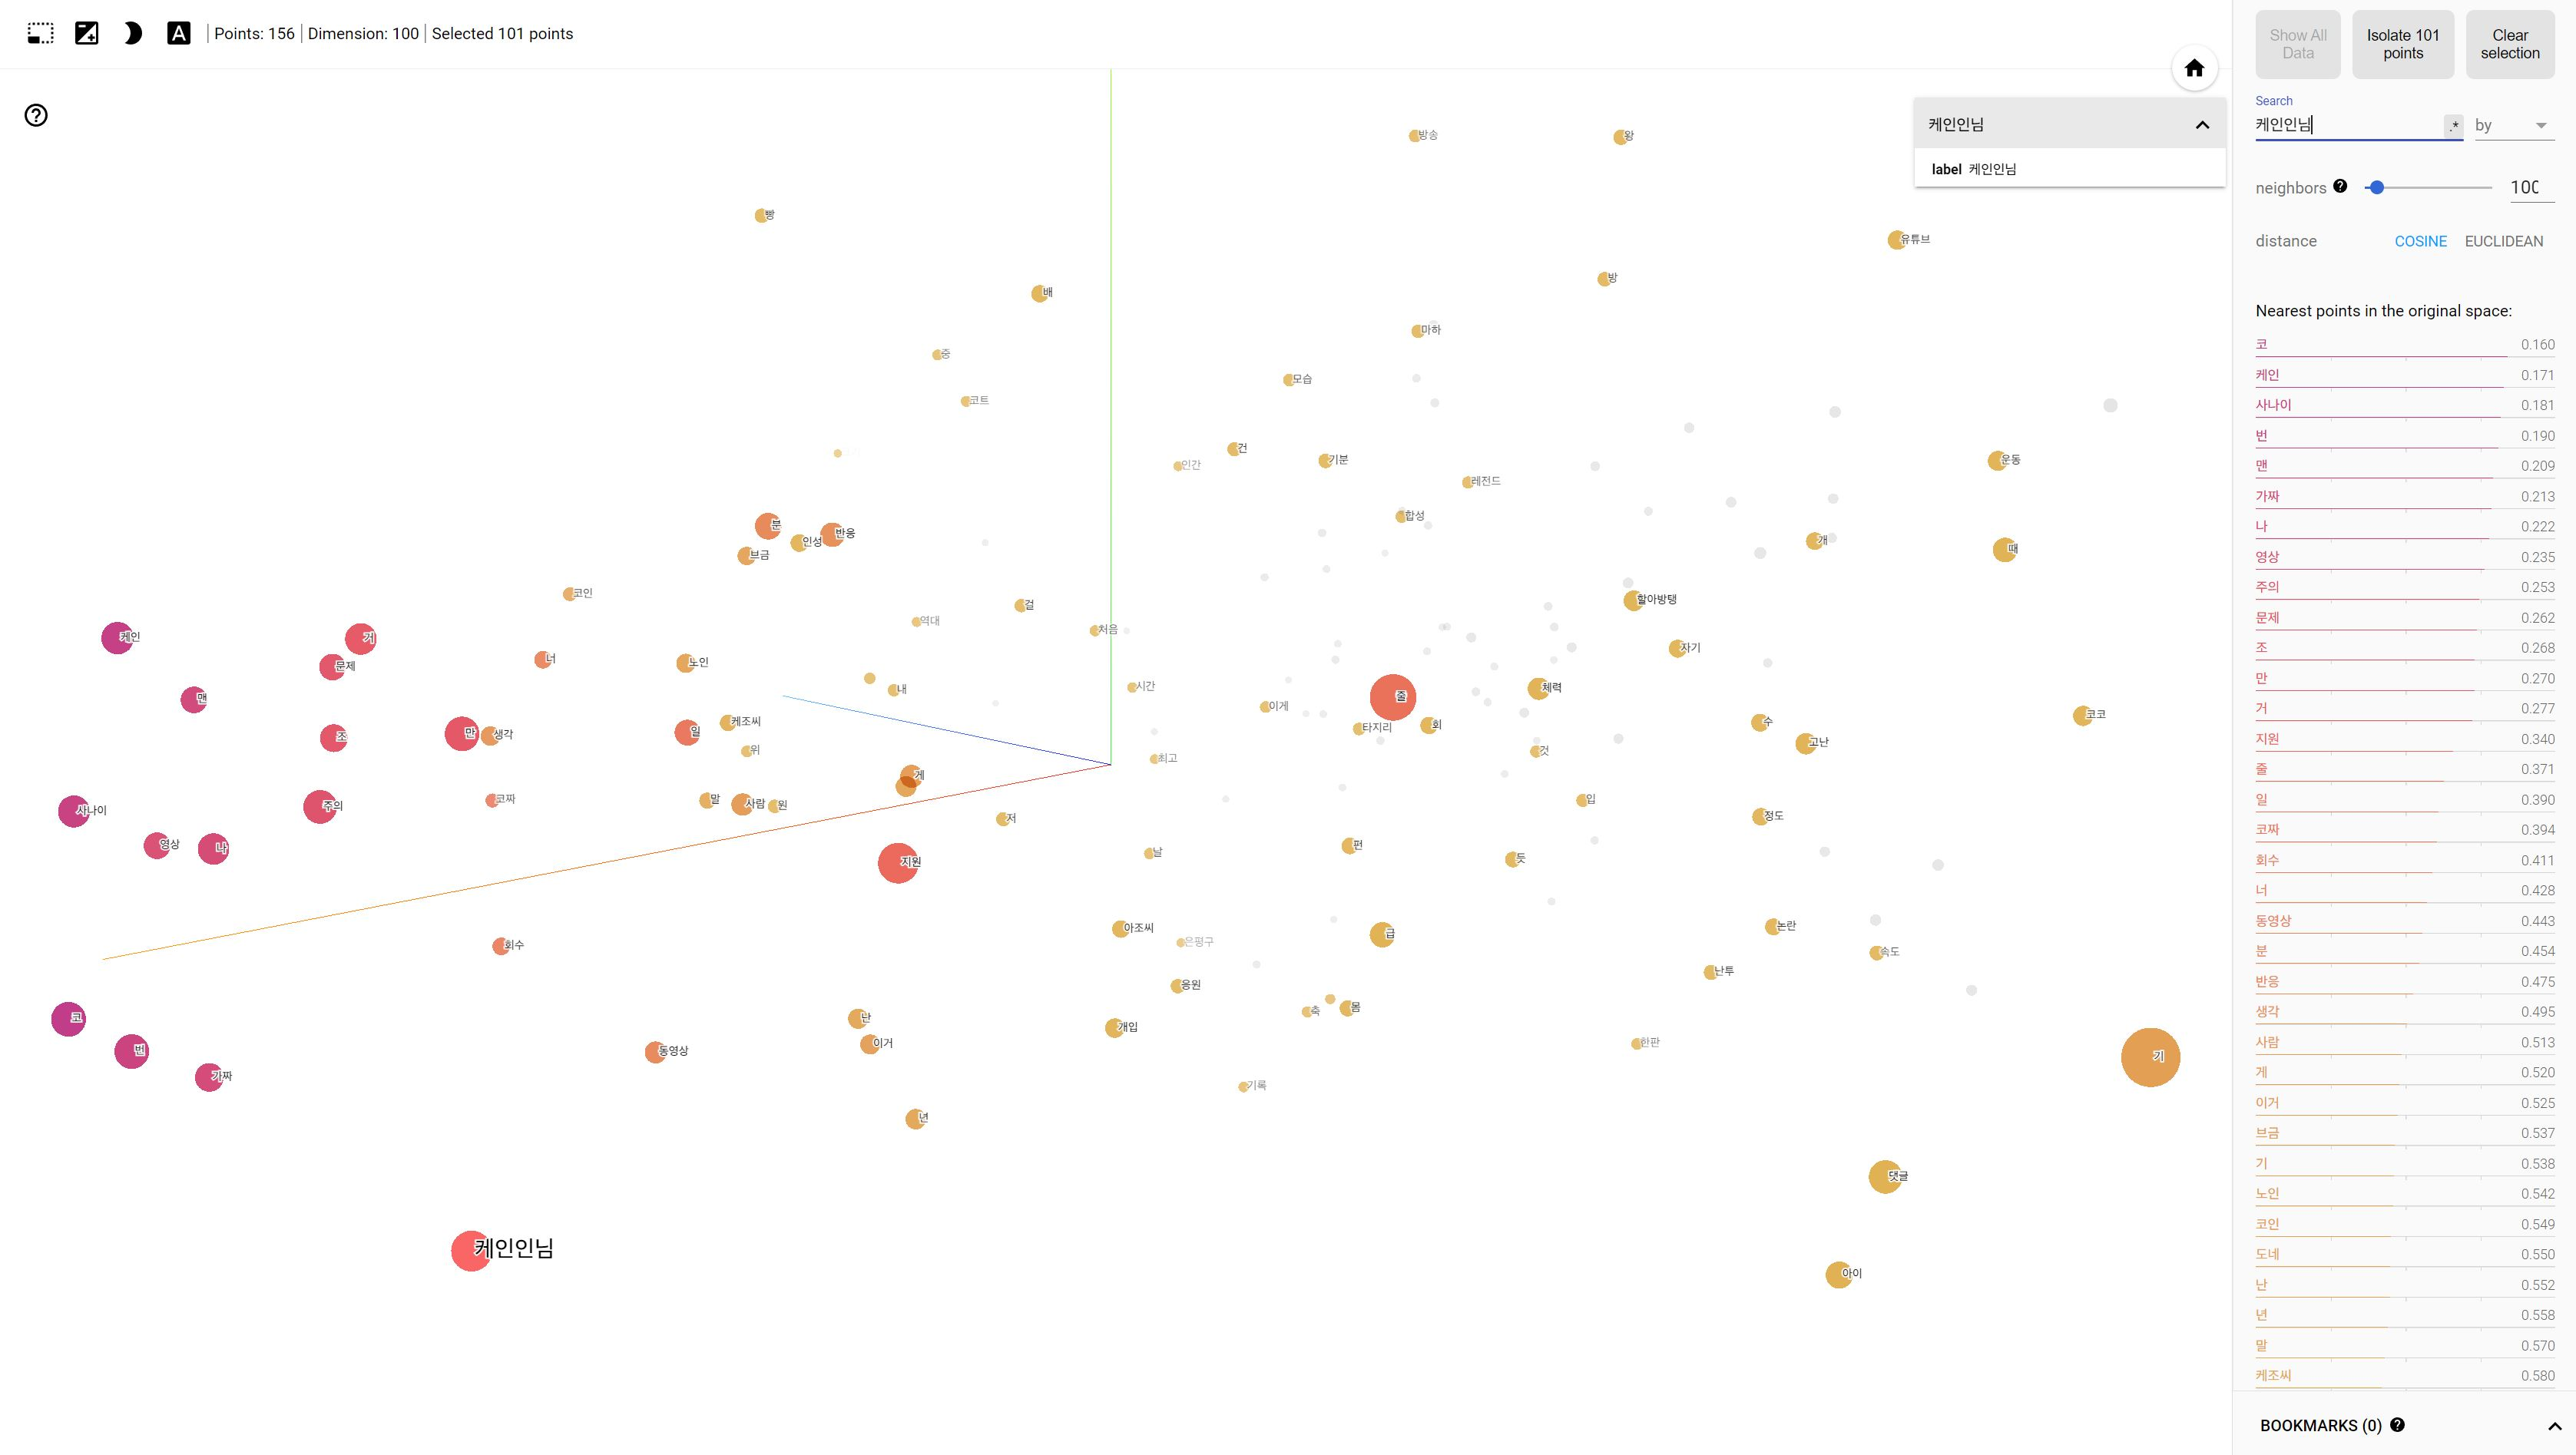

In [140]:
Image('C:/workspace/Img/kane_anaz.jpg')

## ÏÜåÍ∞ê
- Ïõê Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÎã§, Ìïú Í∞úÏùò ÏòÅÏÉÅÏóêÏÑúÎßå ÏàòÏßëÌïòÎäîÍ≤å ÏïÑÎãå ***ÌÖåÎßà***Î•º Ïû°Í≥† Ïù¥Î•º Ï§ëÏã¨ÏúºÎ°ú ÎåìÍ∏ÄÎç∞Ïù¥ÌÑ∞ ÏàòÏßëÏù¥ ÌïÑÏöîÌïòÎã§.
- Î∂ÑÏÑùÏóê ÏûàÏñ¥ÏÑú ÎèÑÎ©îÏù∏ ÏßÄÏãùÏù¥ ÎÜíÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, stopword Ï∂îÍ∞ÄÌïòÎäîÍ≤å Îß§Ïö∞ Ïö©Ïù¥ÌñàÏùå. Îî∞Î°ú Í≤ÄÏÉâÏù¥ ÌïÑÏöîÏóÜÏóàÎã§.
- Ï†ÑÏ≤òÎ¶¨ÌïòÎäîÎç∞ ÍΩ§ ÎßéÏùÄ ÏãúÍ∞ÑÏù¥ Í±∏Î†∏Îã§.
- `Mecab` Dictionary Ï∂îÍ∞Ä Îì±Î°ùÌïòÎäîÎç∞ ÎßéÏù¥ Ïï†Î®πÏóàÎã§.
- Îçî Îã§ÏñëÌïú Î∂ÑÏÑùÍ∏∞Î≤ïÏùÑ ÌôúÏö©Ìï¥Î≥¥Í≥†Ïã∂Îã§.
    1. ÏòÅÏÉÅÏùÑ ÌÖåÎßàÎ≥Ñ(ÌÇπÏò§Î∏å, Í≥†ÎØºÏÉÅÎã¥, Í∏∞ÌÉÄÍ≤åÏûÑ, ....)Î°ú Î∂ÑÎ•òÌï¥ ÎåìÍ∏Ä/Ï°∞ÌöåÏàò/Ï¢ãÏïÑÏöî Ïàò/Ïã´Ïñ¥Ïöî Ïàò/ÏóÖÎ°úÎìú ÎÇ†ÏßúÎ•º ÏàòÏßëÌïòÍ≥† Ïó¨Îü¨Í∞ÄÏßÄ Î∂ÑÏÑùÍ∏∞Î≤ïÏùÑ ÌÜµÌï¥ Ïä§Ìä∏Î¶¨Î®∏ÏóêÍ≤å Ï°∞ÌöåÏàòÏôÄ ÎåìÍ∏ÄÏàòÎ•º ÎÜíÍ≤å ÎΩëÎäî Î∞©Î≤ïÏùÑ Ï∂îÏ≤ú >> Ï∂îÏ≤úÏãúÏä§ÌÖú?
    2. ÎåìÍ∏Ä Í∏çÎ∂ÄÏ†ï Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Ïñ¥Îñ§ Ï£ºÏ†úÏùò ÏòÅÏÉÅÏùÑ ÏóÖÎ°úÎìúÌïòÎ©¥ Í∏çÏ†ïÏó¨Î°†ÏùÑ ÎßéÏù¥ Î∞õÏùÑ Ïàò ÏûàÎäîÏßÄ Ï†úÏïà
    3. Îã¨ Î≥ÑÎ°ú(each month) Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöî Ïàò, Ïã´Ïñ¥Ïöî ÏàòÎäî Ïñ¥Îñ§ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ?
    4. 3Î≤àÏùÑ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ(line plot)Î°ú ÏãúÍ∞ÅÌôî